# Новый раздел

In [ ]:
#https://habr.com/ru/articles/748282/

In [ ]:
import torch
torch.__version__

'2.1.0+cu118'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
import matplotlib.pyplot as plt
import csv

X = []
Y = []

with open('*.csv', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')

    for ROWS in plotting:
        X.append(float(ROWS[5]))
        Y.append(float(ROWS[1]))

plt.plot(X, Y)
plt.title('Line Graph using CSV')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
# Initialize data

train_data = [[1, 4, 5, 6],
              [4, 5, 6, 7],
              [30, 40, 50, 60]]

eval_data = [[2, 4, 6, 8],
             [1, 4, 50, 60]]

train_labels = [10, 20, 30]
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2,
                          task_type="GPU",
                          devices='0:1')
# Fit model
model.fit(train_data, train_labels)
# Get predictions
preds = model.predict(eval_data)

0:	learn: 6.1237244	total: 29.6ms	remaining: 29.6ms
1:	learn: 4.5927933	total: 34.6ms	remaining: 0us


In [ ]:
preds

array([17.5, 20. ])

In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://biconsult.ru/img/datascience-ml-ai/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.dropna(subset=['Survived'],inplace=True)
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']
X['Pclass'] = X['Pclass'].astype('str')
X['Fare'].fillna(0,inplace=True)
X['Age'].fillna(0,inplace=True)

<ipython-input-9-8dbfec9919f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pclass'] = X['Pclass'].astype('str')
<ipython-input-9-8dbfec9919f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(0,inplace=True)
<ipython-input-9-8dbfec9919f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(0,inplace=True)


In [ ]:
def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies
categorical_indicies = get_categorical_indicies(X)

def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')
convert_cats(X)

<ipython-input-10-7d1159ca3e16>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-10-7d1159ca3e16>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [ ]:
train_dataset = cb.Pool(X_train,y_train,
                        cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test,y_test,
                       cat_features=categorical_indicies)


model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2,
                          task_type="GPU",
                          devices='0:1',
                          loss_function='Logloss',
                          eval_metric='Accuracy')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5,],
        'iterations': [50, 100, 150]}


model.grid_search(grid,train_dataset)
pred = model.predict(X_test)
#print(classification_report(y_test, pred))

# **Pandas. Объединение таблиц. Работа с данными.**:



In [ ]:
import pandas as pd

In [ ]:
# Загрузка train_data
data_1 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/target train_Црсв 1ЦЗ.csv')
data_2 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/target train_Црсв 2ЦЗ.csv')
data_3 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Объем покупки.csv')
data_4 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Объем продажи.csv')
#data_5 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Признак запирания сечений.csv')
data_6 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Производство по типам станций.csv')
#data_6 = data_6.add_prefix("Производство_по_типам_станций ")
#data_7 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_ТГ 1ЦЗ.csv')

In [ ]:
data_pz = pd.concat([data_1, data_2])
data_pzu = data_pz.pivot(index='Дата',columns='Ценовая зона', values='Цена руб/МВтч')
data_3u = data_3.pivot(index='Дата',columns='ОЭС', values='Объем покупки')
data_3u = data_3u.add_prefix("3u ")
data_4u = data_4.pivot(index='Дата',columns='ОЭС', values='Объем продажи')
data_4u = data_4u.add_prefix("4u ")
#data_5.pivot(index='Дата',columns='ОЭС', values='Объем продаж')
data_6u = data_6.pivot(index='Дата',columns=['ОЭС', 'Обобщенный тип'], values='Плановый объем производства МВтч')
#data_7.pivot(index='Дата',columns='ОЭС', values='Объем продажи')

In [ ]:
data_ready = pd.concat([data_pzu, data_3u, data_4u, data_6u], axis = 1)
data_ready['y'] = data_ready['Сибирь'].shift(-24)
data_ready = data_ready.dropna(axis=0)

In [ ]:
# Загрузка eval_data
data_1e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/target test_Црсв 1ЦЗ.csv')
data_2e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/target test_Црсв 2ЦЗ.csv')
data_3e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Объем покупки.csv')
data_4e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Объем продажи.csv')
#data_5e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Признак запирания сечений.csv')
data_6e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Производство по типам станций.csv')
#data_6e = data_6e.add_prefix("Производство_по_типам_станций ")
#data_7e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_ТГ 1ЦЗ.csv')

In [ ]:
data_pze = pd.concat([data_1e, data_2e])
data_pzeu = data_pze.pivot(index='Дата',columns='Ценовая зона', values='Цена руб/МВтч')
data_3eu = data_3e.pivot(index='Дата',columns='ОЭС', values='Объем покупки')
data_3eu = data_3eu.add_prefix("3u ")
data_4eu = data_4e.pivot(index='Дата',columns='ОЭС', values='Объем продажи')
data_4eu = data_4eu.add_prefix("4u ")
#data_5e.pivot(index='Дата',columns='ОЭС', values='Объем продаж')
data_6eu = data_6e.pivot(index='Дата',columns=['ОЭС', 'Обобщенный тип'], values='Плановый объем производства МВтч')
#data_7e.pivot(index='Дата',columns='ОЭС', values='Объем продажи')

In [ ]:
eval_data = pd.concat([data_pzeu, data_3eu, data_4eu, data_6eu], axis = 1)
eval_data['y'] = eval_data['Сибирь'].shift(-24)
eval_data = eval_data.dropna(axis=0)

In [ ]:
#data_ready.to_csv(r"/content/sample_data/data_test.csv", index=False, sep=",")

In [ ]:
np.array(train_data)[0]

NameError: ignored

# **2 этап: CatBoost. Построение модели.**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
# Initialize data

train_data = data_ready.drop(['y'], axis = 1)

train_labels = data_ready['y']
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.01,
                          depth=4,
                          task_type="GPU",
                          devices='0:1')

# Fit model
model.fit(train_data, train_labels)

In [ ]:
eval_labels = eval_data['y']
eval_data = eval_data.drop(['y'], axis = 1)

In [ ]:
import numpy as np

In [ ]:
preds = model.predict(eval_data)
#https://habr.com/ru/companies/sberbank/articles/762472/
for i in range(len(preds)):
    print((preds[i] - eval_labels[i]))

#score = round(model.score(eval_data, eval_labels), 4)
#score
#model.score(np.array(eval_labels), preds)

In [ ]:
preds = model.predict(eval_data)

In [ ]:
y_mean = np.array(eval_labels).reshape(358, 24)
y_mean_r = []
for i in range(len(y_mean)):
  y_mean_r.append(y_mean[i].mean())
y_preds_mean = np.array(preds).reshape(358, 24)
y_preds_mean_r = []
for i in range(len(y_preds_mean)):
  y_preds_mean_r.append(y_preds_mean[i].mean())
y_mean_r = np.array(y_mean_r)
y_preds_mean_r = y_preds_mean_r = np.array(y_preds_mean_r)

y_mean_r, y_preds_mean_r

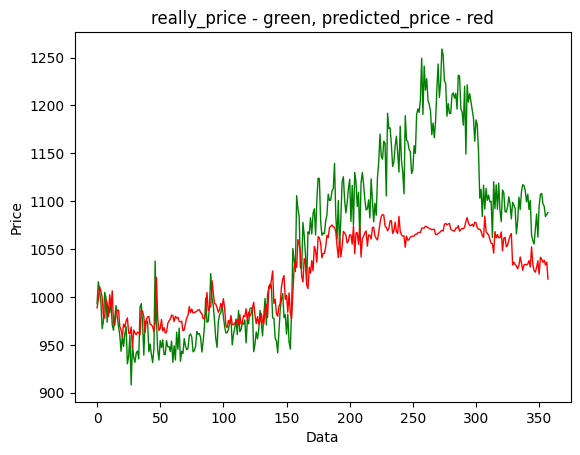

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y_mean_r, color="green", linewidth=1)
mtp.plot(y_preds_mean_r, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

In [ ]:
preds = model.predict(eval_data)
#https://habr.com/ru/companies/sberbank/articles/762472/
for i in range(len(preds)):
    print((preds[i] - eval_labels[i]))

#score = round(model.score(eval_data, eval_labels), 4)
#score
#model.score(np.array(eval_labels), preds)

In [ ]:
preds = model.predict(eval_data)

In [ ]:
y_mean = np.array(eval_labels).reshape(358, 24)
y_mean_r = []
for i in range(len(y_mean)):
  y_mean_r.append(y_mean[i].mean())
y_preds_mean = np.array(preds).reshape(358, 24)
y_preds_mean_r = []
for i in range(len(y_preds_mean)):
  y_preds_mean_r.append(y_preds_mean[i].mean())
y_mean_r = np.array(y_mean_r)
y_preds_mean_r = y_preds_mean_r = np.array(y_preds_mean_r)

y_mean_r, y_preds_mean_r

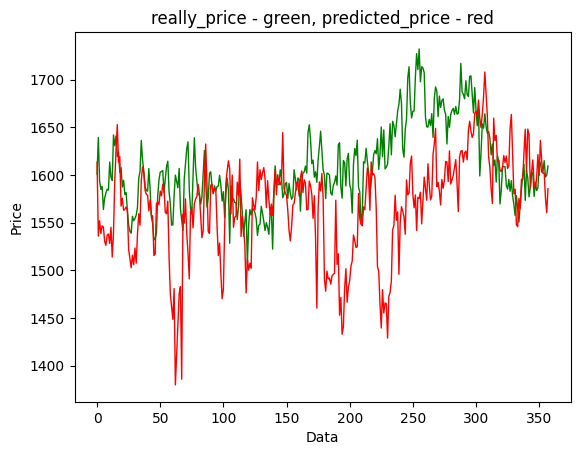

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y_mean_r, color="green", linewidth=1)
mtp.plot(y_preds_mean_r, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
#mtp.show()
mtp.savefig('/content/sample_data/Test.png', dpi=100)

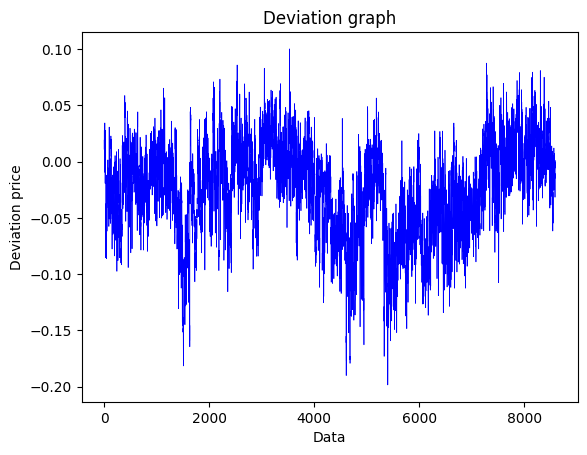

In [ ]:
preds = model.predict(eval_data)
x = []
for i in range(len(preds)):
    x.append((preds[i] - eval_labels[i]) / eval_labels[i])
x = np.array(x)
import matplotlib.pyplot as mtp
mtp.plot(x, color="blue", linewidth=0.5)
mtp.title("Deviation graph")
mtp.xlabel("Data")
mtp.ylabel("Deviation price")
#mtp.show()
mtp.savefig('/content/sample_data/Test_Deviation.png', dpi=100)

In [ ]:
# example of increase in mean squared error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = eval_labels
# predicted value
predicted = preds
# calculate errors
errors = list()
for i in range(len(expected)):
    # calculate error
    err = (expected[i] - predicted[i])**2
    # store error
    errors.append(err)
    # report error
    print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [ ]:
preds = model.predict(np.array(eval_data)[55])

In [ ]:
preds

1447.566901369346

In [ ]:
np.array(eval_labels)[55]

1622.0814814814814

In [ ]:
# Загрузка eval_data
data_1e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/target test_Црсв 1ЦЗ.csv')
data_2e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/target test_Црсв 2ЦЗ.csv')
data_3e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Объем покупки.csv')
data_4e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Объем продажи.csv')
#data_5e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Признак запирания сечений.csv')
data_6e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Производство по типам станций.csv')
#data_7e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_ТГ 1ЦЗ.csv')

In [ ]:
y1 = data_1e['Цена руб/МВтч']
y2 = data_2e['Цена руб/МВтч']
y3 = data_3e['Объем покупки']
y4 = data_4e['Объем продажи']
y5 = data_6e['Плановый объем производства МВтч']

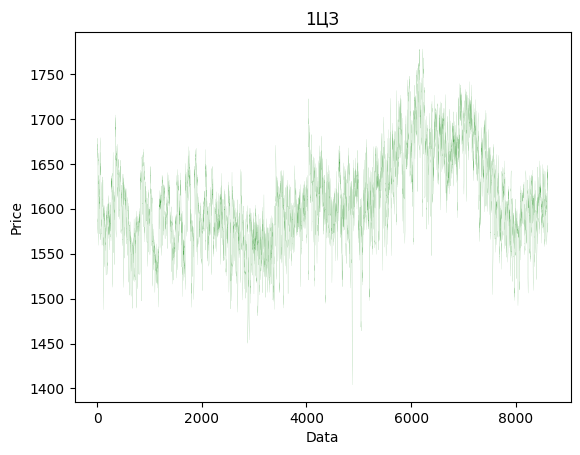

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y1, color="green", linewidth=0.05)
mtp.title("1ЦЗ")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

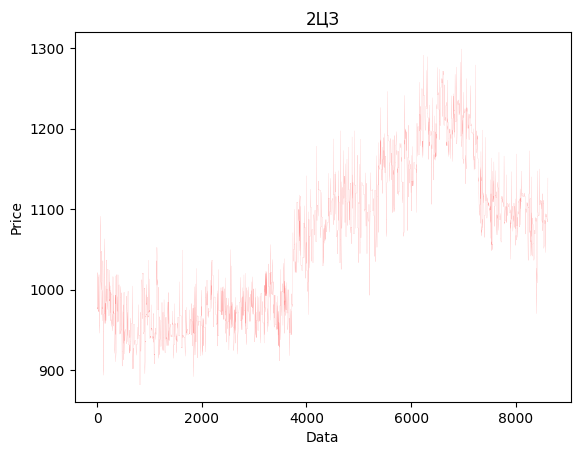

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y2, color="red", linewidth=0.05)
mtp.title("2ЦЗ")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

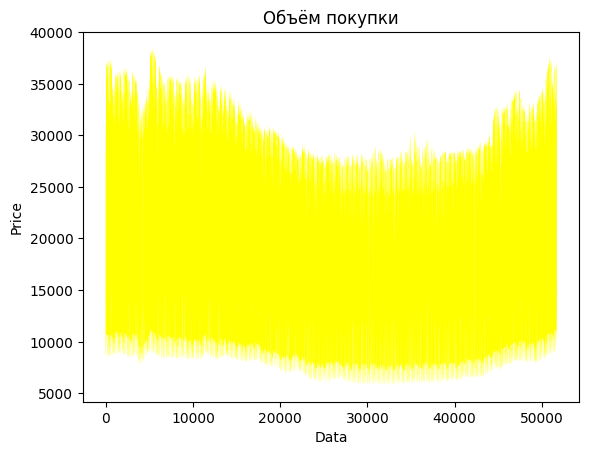

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y3, color="yellow", linewidth=0.05)
mtp.title("Объём покупки")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

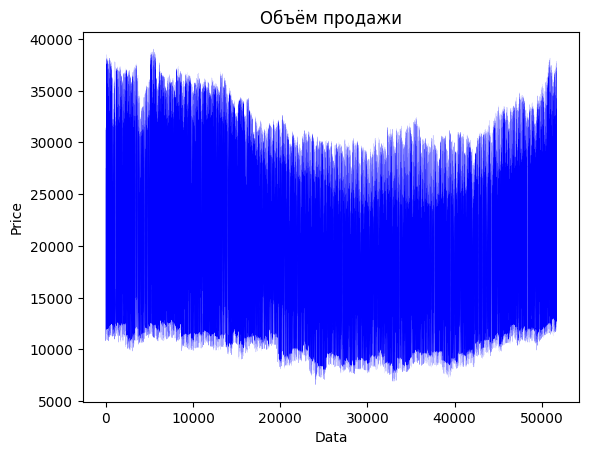

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y4, color="blue", linewidth=0.05)
mtp.title("Объём продажи")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

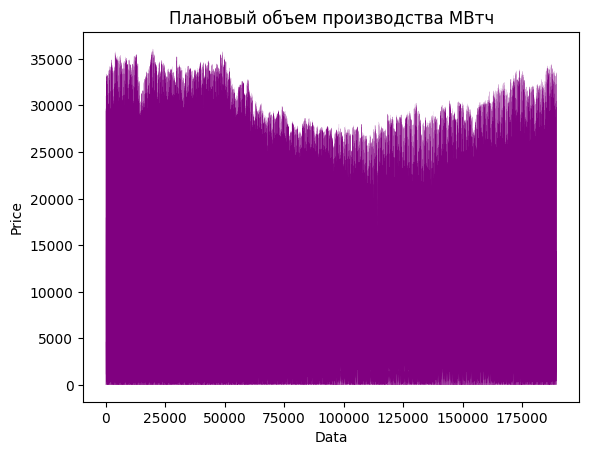

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y5, color="purple", linewidth=0.05)
mtp.title("Плановый объем производства МВтч")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

In [ ]:
#https://encost.com/publikacii/faktory-vliyajushhie-na-cenu-i-tarify-elektroenergii-i-moshhnosti/
#https://habr.com/ru/articles/557998/
#https://habr.com/ru/articles/683442/
#https://www.kaggle.com/code/emstrakhov/lesson-2-correlation-analysis
#https://habr.com/ru/articles/353050/
#https://fas.gov.ru/opendata/

In [ ]:
# Загрузка eval_data
w0 = pd.read_excel('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Погода/2ЦЗ/Пример погоды по одному городу.xls')
w1 = pd.read_excel('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Погода/1ЦЗ/ОЭС Северо-Запада (Санкт-Петербург).xls')
#w2 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Погода/1ЦЗ/ОЭС Средней Волги (Саратов).csv', sep=';', error_bad_lines=False)
#w3 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Погода/1ЦЗ/ОЭС Урала (Пермь).csv', sep=';', error_bad_lines=False)
#w4 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Погода/1ЦЗ/ОЭС Центра (Белгород).csv', sep=';', error_bad_lines=False)
#w5 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Погода/1ЦЗ/ОЭС Юга (Сочи).csv', sep=';', error_bad_lines=False)

In [ ]:
t0 = w0['Unnamed: 1'].dropna(axis=0)
t1 = w1['Unnamed: 1'].dropna(axis=0)
t2 = w2['Unnamed: 1'].dropna(axis=0)
t3 = w3['Unnamed: 1'].dropna(axis=0)
t4 = w4['Unnamed: 1'].dropna(axis=0)
t5 = w5['Unnamed: 1'].dropna(axis=0)

KeyError: ignored

In [ ]:
y1[1:8616], t1[1:8616].astype("float64")

In [ ]:
np.array(w1)

array([['# Кодировка: UTF-8', nan, nan, ..., nan, nan, nan],
       ['# Информация предоставлена сайтом "Расписание Погоды", rp5.ru',
        nan, nan, ..., nan, nan, nan],
       ['# Пожалуйста, при использовании данных, любезно указывайте названный сайт.',
        nan, nan, ..., nan, nan, nan],
       ...,
       ['01.01.2019 06:00', -1.8, 752.2, ..., nan, nan, nan],
       ['01.01.2019 03:00', -1.6, 757.3, ..., nan, nan, nan],
       ['01.01.2019 00:00', -1.7, 760.9, ..., nan, nan, nan]],
      dtype=object)

In [ ]:
import scipy

In [ ]:
scipy.stats.pearsonr(y1[1:8616], t1[1:8616].astype("float64"))

PearsonRResult(statistic=0.14781899094768022, pvalue=2.7709836153448856e-43)

# **Создание итоговой модели для 2ЦЗ**

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
def converter(data):
    data_r = []
    for i in range(len(data)):
      if i%2 != 0:
        data_r.append(data[i])
    return np.array(data_r)

In [ ]:
def reverse(data):
  data = data.tolist()
  data = list(reversed(data))
  data = pd.DataFrame(data=np.array(data))
  return data

In [ ]:
def get_time(data):
  data_hours = []
  data_days = []
  data_months = []
  data_years = []
  data_weekdays = []
  data = np.array(data)
  for i in range(len(data)):
    hour = int(''.join(data[i]).split()[1].split(':')[0])
    day = int(''.join(data[i]).split()[0].split('.')[0])
    month = int(''.join(data[i]).split()[0].split('.')[1])
    year = int(''.join(data[i]).split()[0].split('.')[2])
    data_hours.append(hour)
    data_days.append(day)
    data_months.append(month)
    data_years.append(year)
    data_weekdays.append(datetime.datetime(year, month, day).weekday())
  data_hours = pd.DataFrame(data=np.array(data_hours))
  data_days = pd.DataFrame(data=np.array(data_days))
  data_months = pd.DataFrame(data=np.array(data_months))
  data_years = pd.DataFrame(data=np.array(data_years))
  data_weekdays = pd.DataFrame(data=np.array(data_weekdays))
  return (data_hours, data_days, data_weekdays, data_months, data_years)

In [ ]:
# Загрузка train_data
data_1 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/target train_Црсв 1ЦЗ.csv').fillna(0)
data_2 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/target train_Црсв 2ЦЗ.csv').fillna(0)
data_3 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Объем покупки.csv').fillna(0)
data_4 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Объем продажи.csv').fillna(0)
data_5 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Признак запирания сечений.csv').fillna(0)
data_6 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_Производство по типам станций.csv').fillna(0)
data_7 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/New_Dataset/Прогноз погоды ОЭС Сибири (Кемерово)_train.csv', sep=";", error_bad_lines=False).fillna(0)
data_8 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train/train_ТГ 1ЦЗ.csv').fillna(0)

In [ ]:
data_pz = pd.concat([data_1, data_2])
data_8u = data_8.add_prefix("u ")
data_a = pd.concat([data_5, data_8u], axis=1).fillna(0)
data_pg = data_a['Дата']
del data_a['Дата']
del data_a['u Дата']
data_pzu = data_pz.pivot(index='Дата',columns='Ценовая зона', values='Цена руб/МВтч')
data_3u = data_3.pivot(index='Дата',columns='ОЭС', values='Объем покупки')
data_3u = data_3u.add_prefix("3u ")
data_4u = data_4.pivot(index='Дата',columns='ОЭС', values='Объем продажи')
data_4u = data_4u.add_prefix("4u ")
#data_5.pivot(index='Дата',columns='ОЭС', values='Объем продаж')
data_6u = data_6.pivot(index='Дата',columns=['ОЭС', 'Обобщенный тип'], values='Плановый объем производства МВтч').fillna(0)
data_7u_T = reverse(data_7['T'])
data_7u_P = reverse(data_7['P'])
data_7u_U = reverse(data_7['U'])
data_7u_Ff = reverse(data_7['Ff'])
data_data = reverse(data_7['Местное время в Кемерове (аэропорт)'])
#data_7.pivot(index='Дата',columns='ОЭС', values='Объем продажи')

In [ ]:
mask = []
for i in data_pg.values:
  mask.append(i[:7])

data_9 = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Цены на газ по месяцам_train.csv', sep=";", error_bad_lines=False).fillna(0)

val_9 = {}
for i in data_9.values:
  val_9[i[0]] = float(i[1].replace(',', '.'))

ready = []
for k, v in val_9.items():
  for n in mask:
    if k == n:
        ready.append(v)

ready = np.array(ready)
ready = pd.DataFrame(ready).add_prefix('Gaz_price ')

In [ ]:
data_data_Future = get_time(pd.DataFrame(data=converter(np.array(data_data.shift(-96).dropna(axis=0)))).add_prefix("Время Future "))
data_data_current = get_time(pd.DataFrame(data=converter(np.array(data_data.shift(-48).dropna(axis=0)))).add_prefix("Время Current "))

hours_Future = data_data_Future[0].add_prefix('hours_Future ')
days_Future = data_data_Future[1].add_prefix('days_Future ')
weekdays_Future = data_data_Future[2].add_prefix('weekdays_Future ')
months_Future = data_data_Future[3].add_prefix('months_Future ')
years_Future = data_data_Future[4].add_prefix('years_Future ')

hours_current = data_data_current[0].add_prefix('hours_current ')
days_current = data_data_current[1].add_prefix('days_current ')
weekdays_current = data_data_current[2].add_prefix('weekdays_current ')
months_current = data_data_current[3].add_prefix('months_current ')
years_current = data_data_current[4].add_prefix('years_current ')

In [ ]:
data_7u_T_Future = pd.DataFrame(data=converter(np.array(data_7u_T.shift(-48).dropna(axis=0)))).add_prefix("Температура Future ") # Температура
data_7u_T_current = pd.DataFrame(data=converter(np.array(data_7u_T.dropna(axis=0)))).add_prefix("Температура Current ") # Температура

In [ ]:
data_7u_P_Future = pd.DataFrame(data=converter(np.array(data_7u_P.shift(-48).dropna(axis=0)))).add_prefix("Атмосферное давление Future ") # Атмосферное давление
data_7u_P_current = pd.DataFrame(data=converter(np.array(data_7u_P.dropna(axis=0)))).add_prefix("Атмосферное давление Current ") # Атмосферное давление

In [ ]:
data_7u_U_Future = pd.DataFrame(data=converter(np.array(data_7u_U.shift(-48).dropna(axis=0)))).add_prefix("Относительная влажность Future ") # Относительная влажность
data_7u_U_current = pd.DataFrame(data=converter(np.array(data_7u_U.dropna(axis=0)))).add_prefix("Относительная влажность Current ") # Относительная влажность

In [ ]:
data_7u_Ff_Future = pd.DataFrame(data=converter(np.array(data_7u_Ff.shift(-48).dropna(axis=0)))).add_prefix('Скорость ветра Future ') # Скорость ветра
data_7u_Ff_current = pd.DataFrame(data=converter(np.array(data_7u_Ff.dropna(axis=0)))).add_prefix('Скорость ветра Current ') # Скорость ветра

In [ ]:
data_ready = pd.concat([data_pzu, data_3u, data_4u, data_6u, data_pg,                                                   # 1ЦЗ, 2ЦЗ, Объём покупок и продаж, По типам станций
                        hours_Future, days_Future, weekdays_Future, months_Future, years_Future,                        # Время через сутки (час, день, день недели, месяц, год)
                        hours_current, days_current, weekdays_current, months_current, years_current,                   # Текущее время (час, день, день недели, месяц, год)
                        data_7u_T_Future, data_7u_P_Future, data_7u_U_Future, data_7u_Ff_Future,                        # Погода через сутки
                        data_7u_T_current, data_7u_P_current, data_7u_U_current, data_7u_Ff_current,                    # Текущая погода
                        ready], axis = 1)                                                                               # Текущие цены на газ

In [ ]:
data_ready = pd.concat([data_ready, data_a], axis = 1)

In [ ]:
data_ready['y'] = data_ready['Сибирь'].shift(-24)#data_ready['Сибирь'] - data_ready['Сибирь'].shift(-24)
data_ready['Температура Current 0'] = data_ready['Температура Current 0'].shift(-34416)
data_ready['Атмосферное давление Current 0'] = data_ready['Атмосферное давление Current 0'].shift(-34416)
data_ready['Относительная влажность Current 0'] = data_ready['Относительная влажность Current 0'].shift(-34416)
data_ready['Скорость ветра Current 0'] = data_ready['Скорость ветра Current 0'].shift(-34416)

data_ready['Температура Future 0'] = data_ready['Температура Future 0'].shift(-34416)
data_ready['Атмосферное давление Future 0'] = data_ready['Атмосферное давление Future 0'].shift(-34416)
data_ready['Относительная влажность Future 0'] = data_ready['Относительная влажность Future 0'].shift(-34416)
data_ready['Скорость ветра Future 0'] = data_ready['Скорость ветра Future 0'].shift(-34416)

data_ready['hours_current 0'] = data_ready['hours_current 0'].shift(-34416)
data_ready['days_current 0'] = data_ready['days_current 0'].shift(-34416)
data_ready['weekdays_current 0'] = data_ready['weekdays_current 0'].shift(-34416)
data_ready['months_current 0'] = data_ready['months_current 0'].shift(-34416)
data_ready['years_current 0'] = data_ready['years_current 0'].shift(-34416)

data_ready['hours_Future 0'] = data_ready['hours_Future 0'].shift(-34416)
data_ready['days_Future 0'] = data_ready['days_Future 0'].shift(-34416)
data_ready['weekdays_Future 0'] = data_ready['weekdays_Future 0'].shift(-34416)
data_ready['months_Future 0'] = data_ready['months_Future 0'].shift(-34416)
data_ready['years_Future 0'] = data_ready['years_Future 0'].shift(-34416)

data_ready['Gaz_price 0'] = data_ready['Gaz_price 0'].shift(-34416)
data_ready['Дата'] = data_ready['Дата'].shift(-34416)
#data_ready = data_ready.dropna(axis=0)

In [ ]:
data_ready = pd.concat([data_pzu, data_3u, data_4u, data_6u,                                                # 1ЦЗ, 2ЦЗ, Объём покупок и продаж, По типам станций
                        data_7u_T_current, data_7u_P_current, data_7u_U_current, data_7u_Ff_current,        # Текущая погода
                        ready], axis = 1)                                                                   # Текущие цены на газ

In [ ]:
data_ready['y'] = data_ready['Сибирь'].shift(-24)#data_ready['Сибирь'] - data_ready['Сибирь'].shift(-24)
data_ready['Температура Current 0'] = data_ready['Температура Current 0'].shift(-34416)
data_ready['Атмосферное давление Current 0'] = data_ready['Атмосферное давление Current 0'].shift(-34416)
data_ready['Относительная влажность Current 0'] = data_ready['Относительная влажность Current 0'].shift(-34416)
data_ready['Скорость ветра Current 0'] = data_ready['Скорость ветра Current 0'].shift(-34416)

'''data_ready['Температура Future 0'] = data_ready['Температура Future 0'].shift(-34416)
data_ready['Атмосферное давление Future 0'] = data_ready['Атмосферное давление Future 0'].shift(-34416)
data_ready['Относительная влажность Future 0'] = data_ready['Относительная влажность Future 0'].shift(-34416)
data_ready['Скорость ветра Future 0'] = data_ready['Скорость ветра Future 0'].shift(-34416)

data_ready['hours_current 0'] = data_ready['hours_current 0'].shift(-34416)
data_ready['days_current 0'] = data_ready['days_current 0'].shift(-34416)
data_ready['weekdays_current 0'] = data_ready['weekdays_current 0'].shift(-34416)
data_ready['months_current 0'] = data_ready['months_current 0'].shift(-34416)
data_ready['years_current 0'] = data_ready['years_current 0'].shift(-34416)

data_ready['hours_Future 0'] = data_ready['hours_Future 0'].shift(-34416)
data_ready['days_Future 0'] = data_ready['days_Future 0'].shift(-34416)
data_ready['weekdays_Future 0'] = data_ready['weekdays_Future 0'].shift(-34416)
data_ready['months_Future 0'] = data_ready['months_Future 0'].shift(-34416)
data_ready['years_Future 0'] = data_ready['years_Future 0'].shift(-34416)'''

data_ready['Gaz_price 0'] = data_ready['Gaz_price 0'].shift(-34416)
#data_ready['Дата'] = data_ready['Дата'].shift(-34416)
#data_ready = data_ready.dropna(axis=0)

In [ ]:
data_ready = data_ready.reset_index()

In [ ]:
data_ready = data_ready.dropna(axis=0)

In [ ]:
data_ready

,Европа,Сибирь,3u ОЭС Северо-запада,3u ОЭС Сибири,3u ОЭС Средней Волги,3u ОЭС Урала,3u ОЭС Центра,3u ОЭС Юга,4u ОЭС Северо-запада,4u ОЭС Сибири,...,"(ОЭС Юга, ВИЭ)","(ОЭС Юга, ГЭС)","(ОЭС Юга, ТЭС)","(ОЭС Северо-запада, ВИЭ)",Температура Current 0,Атмосферное давление Current 0,Относительная влажность Current 0,Скорость ветра Current 0,Gaz_price 0,y
2019-01-01 00:00:00.000,1325.848485,928.101449,8836.71,24726.35,12257.72,29811.02,26916.35,11881.36,11630.26,24331.27,...,10.000,1924.649,5624.390,0.0,-12.0,773.9,85.0,2.0,482.42,934.029412
2019-01-01 01:00:00.000,1328.556818,928.101449,8679.85,24742.03,11957.23,29482.28,26320.34,11456.32,11605.93,24261.21,...,10.000,1580.605,5583.258,0.0,-12.0,773.9,85.0,1.0,482.42,934.029412
2019-01-01 02:00:00.000,1335.621212,928.101449,8504.44,24778.58,11685.90,29218.70,26684.07,10989.03,11027.46,24244.74,...,10.000,1156.937,5537.761,0.0,-12.0,773.9,85.0,1.0,482.42,922.838235
2019-01-01 03:00:00.000,1335.772727,928.101449,8323.93,24891.46,11474.54,29130.77,26008.53,10652.89,10871.70,24310.46,...,6.000,903.750,5607.883,0.0,-12.0,773.9,85.0,1.0,482.42,934.029412
2019-01-01 04:00:00.000,1335.962121,928.101449,8173.23,25037.16,11369.31,29134.31,25597.02,10451.10,10812.71,24664.00,...,6.000,903.750,5489.590,0.0,-12.0,773.9,85.0,1.0,482.42,911.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 01:00:00.000,1459.963563,986.023810,8123.02,24621.63,11268.96,29376.17,28047.02,10807.39,11352.10,23674.66,...,936.556,1123.390,5068.297,10.0,-23.0,777.7,77.0,0.0,2171.40,950.879121
2022-11-18 02:00:00.000,1445.850202,983.190476,7985.83,25429.93,11177.71,29402.90,27601.92,10590.37,11340.13,24449.49,...,1044.114,1120.540,5013.394,10.0,-23.0,777.7,84.0,1.0,2171.40,959.142857
2022-11-18 03:00:00.000,1452.712551,983.190476,7906.91,26120.54,11196.22,29698.51,27537.77,10519.87,11333.09,25091.98,...,1082.132,1120.540,5006.638,10.0,-23.0,777.7,77.0,1.0,2171.40,959.142857
2022-11-18 04:00:00.000,1440.251012,983.190476,7903.39,26675.50,11404.34,30554.58,27826.77,10619.87,11348.73,25586.84,...,989.029,1120.540,5083.197,10.0,-23.0,777.7,77.0,1.0,2171.40,1008.318681


In [ ]:
data_ready = data_ready.sample(frac=1)

In [ ]:
j = data_ready['y'].values
max(j)

1207.1470588235295

In [ ]:
a = list(data_ready.loc[:, '5':'u 5950'])

for i in a:
  data_ready[i] = data_ready[i].shift(-34416)

In [ ]:
data_ready.to_csv(r"/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train_data_r.csv", index=False, sep=",")

In [ ]:
# Загрузка eval_data
data_1e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/target test_Црсв 1ЦЗ.csv').fillna(0)
data_2e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/target test_Црсв 2ЦЗ.csv').fillna(0)
data_3e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Объем покупки.csv').fillna(0)
data_4e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Объем продажи.csv').fillna(0)
data_5e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Признак запирания сечений.csv').fillna(0)
data_6e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_Производство по типам станций.csv').fillna(0)
data_7e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/New_Dataset/Прогноз погоды ОЭС Сибири (Кемерово)_test.csv', sep=";", error_bad_lines=False).fillna(0)
data_8e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test/test_ТГ 1ЦЗ.csv').fillna(0)

In [ ]:
data_pze = pd.concat([data_1e, data_2e])
data_pzeu = data_pze.pivot(index='Дата',columns='Ценовая зона', values='Цена руб/МВтч')
data_8u = data_8.add_prefix("u ")
data_a = pd.concat([data_5e, data_8u], axis=1)
data_pge = data_a['Дата'].dropna(axis=0)
data_a = data_a.fillna(0)
del data_a['Дата']
del data_a['u Дата']
data_3eu = data_3e.pivot(index='Дата',columns='ОЭС', values='Объем покупки')
data_3eu = data_3eu.add_prefix("3u ")
data_4eu = data_4e.pivot(index='Дата',columns='ОЭС', values='Объем продажи')
data_4eu = data_4eu.add_prefix("4u ")
data_6eu = data_6e.pivot(index='Дата',columns=['ОЭС', 'Обобщенный тип'], values='Плановый объем производства МВтч').fillna(0)

data_7u_T = reverse(data_7e['T'])
data_7u_P = reverse(data_7e['P'])
data_7u_U = reverse(data_7e['U'])
data_7u_Ff = reverse(data_7e['Ff'])
data_data = reverse(data_7e['Местное время в Кемерове (аэропорт)'])

In [ ]:
mask_e = []
for i in data_pge.values:
  mask_e.append(i[:7])

data_9e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Цены на газ по месяцам_test.csv', sep=";", error_bad_lines=False).fillna(0)

val_9e = {}
for i in data_9e.values:
  val_9e[i[0]] = float(i[1].replace(',', '.'))

ready_e = []
for k, v in val_9e.items():
  for n in mask_e:
    if k == n:
        ready_e.append(v)

ready_e = np.array(ready_e)
ready_e = pd.DataFrame(ready_e).add_prefix('Gaz_price ')

<ipython-input-24-73639dc19c2a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_9e = pd.read_csv('/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/Цены на газ по месяцам_test.csv', sep=";", error_bad_lines=False).fillna(0)


In [ ]:
data_data_Future = get_time(pd.DataFrame(data=converter(np.array(data_data.shift(-48).dropna(axis=0)))).add_prefix("Время Future "))
data_data_current = get_time(pd.DataFrame(data=converter(np.array(data_data.dropna(axis=0)))).add_prefix("Время Current "))

hours_Future = data_data_Future[0].add_prefix('hours_Future ')
days_Future = data_data_Future[1].add_prefix('days_Future ')
weekdays_Future = data_data_Future[2].add_prefix('weekdays_Future ')
months_Future = data_data_Future[3].add_prefix('months_Future ')
years_Future = data_data_Future[4].add_prefix('years_Future ')

hours_current = data_data_current[0].add_prefix('hours_current ')
days_current = data_data_current[1].add_prefix('days_current ')
weekdays_current = data_data_current[2].add_prefix('weekdays_current ')
months_current = data_data_current[3].add_prefix('months_current ')
years_current = data_data_current[4].add_prefix('years_current ')

In [ ]:
data_7u_T_Future = pd.DataFrame(data=converter(np.array(data_7u_T.shift(-48).dropna(axis=0)))).add_prefix("Температура Future ") # Температура
data_7u_T_current = pd.DataFrame(data=converter(np.array(data_7u_T.dropna(axis=0)))).add_prefix("Температура Current ") # Температура

In [ ]:
data_7u_P_Future = pd.DataFrame(data=converter(np.array(data_7u_P.shift(-48).dropna(axis=0)))).add_prefix("Атмосферное давление Future ") # Атмосферное давление
data_7u_P_current = pd.DataFrame(data=converter(np.array(data_7u_P.dropna(axis=0)))).add_prefix("Атмосферное давление Current ") # Атмосферное давление

In [ ]:
data_7u_U_Future = pd.DataFrame(data=converter(np.array(data_7u_U.shift(-48).dropna(axis=0)))).add_prefix("Относительная влажность Future ") # Относительная влажность
data_7u_U_current = pd.DataFrame(data=converter(np.array(data_7u_U.dropna(axis=0)))).add_prefix("Относительная влажность Current ") # Относительная влажность

In [ ]:
data_7u_Ff_Future = pd.DataFrame(data=converter(np.array(data_7u_Ff.shift(-48).dropna(axis=0)))).add_prefix('Скорость ветра Future ') # Скорость ветра
data_7u_Ff_current = pd.DataFrame(data=converter(np.array(data_7u_Ff.dropna(axis=0)))).add_prefix('Скорость ветра Current ') # Скорость ветра

In [ ]:
eval_data = pd.concat([data_pzeu, data_3eu, data_4eu, data_6eu, data_pge,                                              # 1ЦЗ, 2ЦЗ, Объём покупок и продаж, По типам станций
                       hours_Future, days_Future, weekdays_Future, months_Future, years_Future,                        # Время через сутки (час, день, день недели, месяц, год)
                       hours_current, days_current, weekdays_current, months_current, years_current,                   # Текущее время (час, день, день недели, месяц, год)
                       data_7u_T_Future, data_7u_P_Future, data_7u_U_Future, data_7u_Ff_Future,                        # Погода через сутки
                       data_7u_T_current, data_7u_P_current, data_7u_U_current, data_7u_Ff_current,                    # Текущая погода
                       ready_e,], axis = 1)                                                                            # Текущие цены на газ

In [ ]:
eval_data = pd.concat([eval_data, data_a], axis = 1)

In [ ]:
eval_data['y'] = eval_data['Сибирь'].shift(-24)#eval_data['Сибирь'] - eval_data['Сибирь'].shift(-24)

eval_data['Температура Current 0'] = eval_data['Температура Current 0'].shift(-8616)
eval_data['Атмосферное давление Current 0'] = eval_data['Атмосферное давление Current 0'].shift(-8616)
eval_data['Относительная влажность Current 0'] = eval_data['Относительная влажность Current 0'].shift(-8616)
eval_data['Скорость ветра Current 0'] = eval_data['Скорость ветра Current 0'].shift(-8616)

eval_data['Температура Future 0'] = eval_data['Температура Future 0'].shift(-8616)
eval_data['Атмосферное давление Future 0'] = eval_data['Атмосферное давление Future 0'].shift(-8616)
eval_data['Относительная влажность Future 0'] = eval_data['Относительная влажность Future 0'].shift(-8616)
eval_data['Скорость ветра Future 0'] = eval_data['Скорость ветра Future 0'].shift(-8616)

eval_data['hours_current 0'] = eval_data['hours_current 0'].shift(-8616)
eval_data['days_current 0'] = eval_data['days_current 0'].shift(-8616)
eval_data['weekdays_current 0'] = eval_data['weekdays_current 0'].shift(-8616)
eval_data['months_current 0'] = eval_data['months_current 0'].shift(-8616)
eval_data['years_current 0'] = eval_data['years_current 0'].shift(-8616)

eval_data['hours_Future 0'] = eval_data['hours_Future 0'].shift(-8616)
eval_data['days_Future 0'] = eval_data['days_Future 0'].shift(-8616)
eval_data['weekdays_Future 0'] = eval_data['weekdays_Future 0'].shift(-8616)
eval_data['months_Future 0'] = eval_data['months_Future 0'].shift(-8616)
eval_data['years_Future 0'] = eval_data['years_Future 0'].shift(-8616)

eval_data['Gaz_price 0'] = eval_data['Gaz_price 0'].shift(-8616)
eval_data['Дата'] = eval_data['Дата'].shift(-8616)
#eval_data = eval_data.dropna(axis=0)

In [ ]:
eval_data = pd.concat([data_pzeu, data_3eu, data_4eu, data_6eu,                       # Погода через сутки
                       data_7u_T_current, data_7u_P_current, data_7u_U_current, data_7u_Ff_current,                    # Текущая погода
                       ready_e,], axis = 1)                                                                            # Текущие цены на газ

In [ ]:
eval_data['y'] = eval_data['Сибирь'].shift(-24)#eval_data['Сибирь'] - eval_data['Сибирь'].shift(-24)

eval_data['Температура Current 0'] = eval_data['Температура Current 0'].shift(-8616)
eval_data['Атмосферное давление Current 0'] = eval_data['Атмосферное давление Current 0'].shift(-8616)
eval_data['Относительная влажность Current 0'] = eval_data['Относительная влажность Current 0'].shift(-8616)
eval_data['Скорость ветра Current 0'] = eval_data['Скорость ветра Current 0'].shift(-8616)

'''eval_data['Температура Future 0'] = eval_data['Температура Future 0'].shift(-8616)
eval_data['Атмосферное давление Future 0'] = eval_data['Атмосферное давление Future 0'].shift(-8616)
eval_data['Относительная влажность Future 0'] = eval_data['Относительная влажность Future 0'].shift(-8616)
eval_data['Скорость ветра Future 0'] = eval_data['Скорость ветра Future 0'].shift(-8616)

eval_data['hours_current 0'] = eval_data['hours_current 0'].shift(-8616)
eval_data['days_current 0'] = eval_data['days_current 0'].shift(-8616)
eval_data['weekdays_current 0'] = eval_data['weekdays_current 0'].shift(-8616)
eval_data['months_current 0'] = eval_data['months_current 0'].shift(-8616)
eval_data['years_current 0'] = eval_data['years_current 0'].shift(-8616)

eval_data['hours_Future 0'] = eval_data['hours_Future 0'].shift(-8616)
eval_data['days_Future 0'] = eval_data['days_Future 0'].shift(-8616)
eval_data['weekdays_Future 0'] = eval_data['weekdays_Future 0'].shift(-8616)
eval_data['months_Future 0'] = eval_data['months_Future 0'].shift(-8616)
eval_data['years_Future 0'] = eval_data['years_Future 0'].shift(-8616)'''

eval_data['Gaz_price 0'] = eval_data['Gaz_price 0'].shift(-8616)
#eval_data['Дата'] = eval_data['Дата'].shift(-8616)
#eval_data = eval_data.dropna(axis=0)

In [ ]:
eval_data = eval_data.reset_index()

In [ ]:
eval_ready = eval_data.dropna(axis=0)

In [ ]:
eval_ready

,index,Европа,Сибирь,3u ОЭС Северо-запада,3u ОЭС Сибири,3u ОЭС Средней Волги,3u ОЭС Урала,3u ОЭС Центра,3u ОЭС Юга,4u ОЭС Северо-запада,...,"(ОЭС Юга, АЭС)","(ОЭС Юга, ВИЭ)","(ОЭС Юга, ГЭС)","(ОЭС Юга, ТЭС)",Температура Current 0,Атмосферное давление Current 0,Относительная влажность Current 0,Скорость ветра Current 0,Gaz_price 0,y
0,2022-12-05 00:00:00.000,1585.603113,976.010101,9108.50,27027.75,12137.19,30853.62,30859.12,12179.24,10830.33,...,3229.0,1349.964,1185.140,6454.792,-23.0,774.7,84.0,2.0,2349.61,972.928571
1,2022-12-05 01:00:00.000,1588.937743,978.414141,8813.65,27406.73,12001.66,30759.48,30243.44,11862.96,10810.61,...,3229.0,1321.153,1128.140,6109.365,-23.0,774.7,84.0,3.0,2349.61,975.357143
2,2022-12-05 02:00:00.000,1578.377432,976.010101,8664.34,28225.51,11935.39,30837.41,29799.90,11634.13,10818.91,...,3229.0,1277.909,1125.190,5961.197,-23.0,774.7,77.0,2.0,2349.61,972.928571
3,2022-12-05 03:00:00.000,1579.723735,976.010101,8574.38,29013.10,11937.13,31152.45,29719.08,11533.61,10823.11,...,3229.0,1215.872,1125.190,5961.197,-23.0,774.7,77.0,2.0,2349.61,972.928571
4,2022-12-05 04:00:00.000,1572.455253,976.010101,8573.29,29692.28,12135.31,32006.72,30003.68,11588.18,10835.92,...,3229.0,1114.816,1125.190,5961.197,-24.0,774.7,84.0,2.0,2349.61,972.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2023-11-27 19:00:00.000,1597.602362,1093.675676,11125.35,27599.73,14611.07,32649.94,35805.12,15501.44,12945.59,...,4278.0,969.781,2097.325,8356.569,-6.0,776.2,74.0,3.0,1311.82,1087.753425
8588,2023-11-27 20:00:00.000,1603.700787,1093.675676,10907.13,27048.59,14312.72,32032.15,35062.64,15286.74,12880.08,...,4278.0,967.066,1852.669,8214.489,-7.0,776.2,79.0,3.0,1311.82,1087.753425
8589,2023-11-27 21:00:00.000,1602.964567,1093.675676,10659.46,26828.89,13903.63,31295.21,34215.26,14826.94,12797.56,...,4280.0,1148.649,1708.157,7885.538,-9.0,776.2,86.0,3.0,1311.82,1087.753425
8590,2023-11-27 22:00:00.000,1596.342520,1093.675676,10253.20,26713.09,13335.87,30562.09,32822.26,14117.01,12206.76,...,4284.0,1240.007,1554.314,7393.000,-10.0,776.2,92.0,3.0,1311.82,1087.753425


In [ ]:
je = eval_data['y'].values
max(je)

1299.126984126984

In [ ]:
a = list(eval_data.loc[:, '5':'u 5950'])

for i in a:
  eval_data[i] = eval_data[i].shift(-8616)

In [ ]:
eval_ready.to_csv(r"/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test_data_r.csv", index=False, sep=",")

In [ ]:
data = pd.concat([data_ready, eval_ready], axis=0)
data = data.sample(frac=1)#data.sort_values(by=["y"], ascending=False)
start = int(len(data)*0.8)
data_train = data[:start].sample(frac=1)
data_test = data[start:len(data)].sample(frac=1)

In [ ]:
data_train

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
# Initialize data

train_data = data_ready.drop(['y'], axis = 1)

train_labels = data_ready['y']


'''train_data = x_data
train_labels = denoised_data'''

'train_data = x_data\ntrain_labels = denoised_data'

In [ ]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.01,
                          depth=2)
                          #task_type="GPU",
                          #devices='0:1')

# Fit model
model.fit(train_data, train_labels)

0:	learn: 78.0161446	total: 74.2ms	remaining: 1m 14s
1:	learn: 77.4898363	total: 89.4ms	remaining: 44.6s
2:	learn: 76.9623962	total: 102ms	remaining: 34s
3:	learn: 76.4511807	total: 118ms	remaining: 29.5s
4:	learn: 75.9208540	total: 131ms	remaining: 26.2s
5:	learn: 75.4192145	total: 146ms	remaining: 24.2s
6:	learn: 74.9222507	total: 158ms	remaining: 22.5s
7:	learn: 74.4053775	total: 171ms	remaining: 21.2s
8:	learn: 73.9285057	total: 185ms	remaining: 20.4s
9:	learn: 73.4254957	total: 198ms	remaining: 19.6s
10:	learn: 72.9242662	total: 212ms	remaining: 19s
11:	learn: 72.4436655	total: 227ms	remaining: 18.7s
12:	learn: 71.9777052	total: 241ms	remaining: 18.3s
13:	learn: 71.4852749	total: 255ms	remaining: 17.9s
14:	learn: 70.9940860	total: 271ms	remaining: 17.8s
15:	learn: 70.5352364	total: 283ms	remaining: 17.4s
16:	learn: 70.0822082	total: 295ms	remaining: 17.1s
17:	learn: 69.6211202	total: 310ms	remaining: 16.9s
18:	learn: 69.1826103	total: 323ms	remaining: 16.7s
19:	learn: 68.7463496	t

In [ ]:
eval_ready = eval_ready.drop('2022-12-05 00:00:00.000')
eval_ready = eval_ready.drop('2022-12-05 01:00:00.000')
eval_ready = eval_ready.drop('2022-12-05 02:00:00.000')
eval_ready = eval_ready.drop('2022-12-05 03:00:00.000')
eval_ready

,Европа,Сибирь,3u ОЭС Северо-запада,3u ОЭС Сибири,3u ОЭС Средней Волги,3u ОЭС Урала,3u ОЭС Центра,3u ОЭС Юга,4u ОЭС Северо-запада,4u ОЭС Сибири,...,"(ОЭС Юга, АЭС)","(ОЭС Юга, ВИЭ)","(ОЭС Юга, ГЭС)","(ОЭС Юга, ТЭС)",Температура Current 0,Атмосферное давление Current 0,Относительная влажность Current 0,Скорость ветра Current 0,Gaz_price 0,y
2022-12-05 04:00:00.000,1572.455253,976.010101,8573.29,29692.28,12135.31,32006.72,30003.68,11588.18,10835.92,29024.42,...,3229.0,1114.816,1125.190,5961.197,-12.0,773.9,85.0,1.0,2349.61,972.928571
2022-12-05 05:00:00.000,1604.077821,976.010101,8745.38,30119.74,12775.05,33129.87,30706.92,12029.70,10868.10,29878.95,...,3229.0,955.927,1229.140,6539.263,-12.0,773.9,85.0,1.0,2349.61,972.928571
2022-12-05 06:00:00.000,1610.377432,976.010101,9165.04,30261.01,13765.14,34210.70,31484.44,12885.51,11298.27,30719.33,...,3229.0,867.027,1355.140,6896.037,-13.0,773.9,92.0,1.0,2349.61,995.642857
2022-12-05 07:00:00.000,1651.085603,1021.212121,9703.30,29702.40,14678.23,34724.29,33596.35,13676.05,11744.50,29621.47,...,3229.0,899.746,1487.207,7487.258,-13.0,773.9,92.0,1.0,2349.61,1018.591837
2022-12-05 08:00:00.000,1673.272374,1021.212121,10268.36,29532.81,15302.24,34798.81,35330.04,14395.81,11877.12,29576.88,...,3229.0,970.263,1863.362,7853.988,-13.0,773.9,92.0,2.0,2349.61,1018.591837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 19:00:00.000,1597.602362,1093.675676,11125.35,27599.73,14611.07,32649.94,35805.12,15501.44,12945.59,29093.70,...,4278.0,969.781,2097.325,8356.569,-8.0,762.0,93.0,3.0,1311.82,1087.753425
2023-11-27 20:00:00.000,1603.700787,1093.675676,10907.13,27048.59,14312.72,32032.15,35062.64,15286.74,12880.08,28876.23,...,4278.0,967.066,1852.669,8214.489,-7.0,762.0,93.0,3.0,1311.82,1087.753425
2023-11-27 21:00:00.000,1602.964567,1093.675676,10659.46,26828.89,13903.63,31295.21,34215.26,14826.94,12797.56,28268.42,...,4280.0,1148.649,1708.157,7885.538,-7.0,762.0,100.0,2.0,1311.82,1087.753425
2023-11-27 22:00:00.000,1596.342520,1093.675676,10253.20,26713.09,13335.87,30562.09,32822.26,14117.01,12206.76,27624.76,...,4284.0,1240.007,1554.314,7393.000,-5.0,762.0,93.0,5.0,1311.82,1087.753425


In [ ]:
eval_ready

,Европа,Сибирь,3u ОЭС Северо-запада,3u ОЭС Сибири,3u ОЭС Средней Волги,3u ОЭС Урала,3u ОЭС Центра,3u ОЭС Юга,4u ОЭС Северо-запада,4u ОЭС Сибири,...,Температура Future 0,Атмосферное давление Future 0,Относительная влажность Future 0,Скорость ветра Future 0,Температура Current 0,Атмосферное давление Current 0,Относительная влажность Current 0,Скорость ветра Current 0,Gaz_price 0,y
2022-12-05 04:00:00.000,1572.455253,976.010101,8573.29,29692.28,12135.31,32006.72,30003.68,11588.18,10835.92,29024.42,...,-26.0,777.7,76.0,1.0,-24.0,774.7,84.0,2.0,2349.61,972.928571
2022-12-05 05:00:00.000,1604.077821,976.010101,8745.38,30119.74,12775.05,33129.87,30706.92,12029.70,10868.10,29878.95,...,-26.0,777.7,76.0,1.0,-23.0,773.9,77.0,2.0,2349.61,972.928571
2022-12-05 06:00:00.000,1610.377432,976.010101,9165.04,30261.01,13765.14,34210.70,31484.44,12885.51,11298.27,30719.33,...,-26.0,777.7,83.0,0.0,-22.0,774.7,77.0,1.0,2349.61,995.642857
2022-12-05 07:00:00.000,1651.085603,1021.212121,9703.30,29702.40,14678.23,34724.29,33596.35,13676.05,11744.50,29621.47,...,-26.0,777.7,76.0,1.0,-24.0,774.7,84.0,1.0,2349.61,1018.591837
2022-12-05 08:00:00.000,1673.272374,1021.212121,10268.36,29532.81,15302.24,34798.81,35330.04,14395.81,11877.12,29576.88,...,-25.0,777.7,76.0,2.0,-24.0,775.5,84.0,1.0,2349.61,1018.591837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-26 23:00:00.000,1598.426295,1085.794118,9926.44,26552.55,12491.91,30059.10,31866.58,12499.69,12260.84,26509.57,...,-10.0,776.2,85.0,4.0,-5.0,778.5,86.0,3.0,1311.82,1093.675676
2023-11-27 00:00:00.000,1591.901575,1046.081081,9593.56,26691.15,12149.80,29701.62,30592.83,12095.13,11757.73,27028.31,...,-11.0,775.5,85.0,4.0,-6.0,778.5,93.0,3.0,1311.82,1088.575342
2023-11-27 01:00:00.000,1602.456693,1046.081081,9292.45,27100.59,11984.02,29585.85,29775.19,11641.47,11760.78,27325.02,...,-12.0,775.5,92.0,3.0,-6.0,778.5,93.0,4.0,1311.82,1088.575342
2023-11-27 02:00:00.000,1584.917323,1074.648649,9146.82,27866.83,11914.29,29610.97,29273.48,11405.22,11742.91,27816.07,...,-11.0,775.5,85.0,2.0,-7.0,778.5,100.0,3.0,1311.82,1088.575342


In [ ]:
eval_labels = data_test['y']
eval_data = data_test.drop(['y'], axis = 1)

In [ ]:
eval_labels = eval_ready['y']
eval_data = eval_ready.drop(['y'], axis = 1)

In [ ]:
preds = model.predict(eval_data)
#https://habr.com/ru/companies/sberbank/articles/762472/
for i in range(len(preds)):
    print((preds[i] - eval_labels[i]))

#score = round(model.score(eval_data, eval_labels), 4)
#score
#model.score(np.array(eval_labels), preds)

In [ ]:
preds = model.predict(eval_data.values)

In [ ]:
preds

In [ ]:
#preds = np.array(eval_data['Сибирь']) - np.array(preds)
y_mean = np.array(eval_labels).reshape(357, 24)#(np.array(eval_data['Сибирь']) - np.array(eval_labels)).reshape(357, 24)
y_mean_r = []
for i in range(len(y_mean)):
  y_mean_r.append(y_mean[i].mean())
y_preds_mean = np.array(preds).reshape(357, 24)
y_preds_mean_r = []
for i in range(len(y_preds_mean)):
  y_preds_mean_r.append(y_preds_mean[i].mean())
y_mean_r = np.array(y_mean_r)
y_preds_mean_r = y_preds_mean_r = np.array(y_preds_mean_r)

#y_mean_r, y_preds_mean_r

ValueError: ignored

In [ ]:
y_mean_r = np.array(eval_data['Сибирь']) - np.array(eval_labels)
y_preds_mean_r = np.array(eval_data['Сибирь']) - np.array(preds)

In [ ]:
y_mean[0][5], preds[5]

In [ ]:
y_mean_r = eval_labels
y_preds_mean_r = preds

In [ ]:
y = eval_labels
p = preds

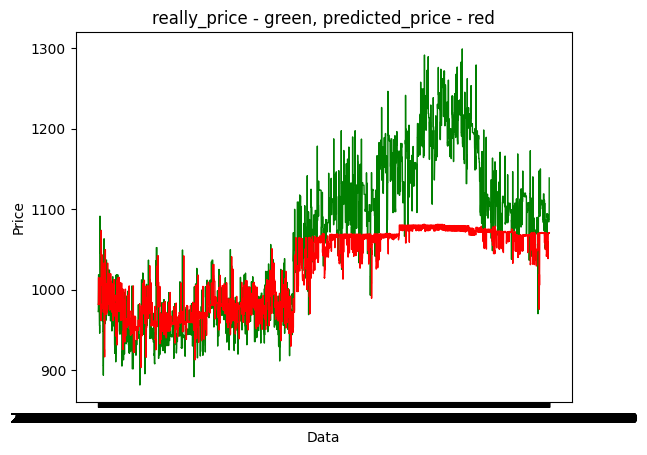

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y, color="green", linewidth=1)
mtp.plot(p, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

In [ ]:
def i(n):
  return y[n], p[n]

In [ ]:
i(690)

(931.8604651162792, 931.1057460847323)

In [ ]:
def accur(y, p, gran=10):
  answ = []
  for n in range(len(y)):
      answ.append(abs(y[n]-p[n]))

  good = 0
  bad = 0
  for i in answ:
    if i <= gran:
      good += 1
    else:
      bad += 1

  return good, bad, good/(bad + good)

In [ ]:
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(eval_labels, preds))

1066.120972546053

In [ ]:
accur(y, p, 35) # 35 - это +- 35 рублей ошибка предсказния. При таком раскладе точность предсказания ~50%. Это значит, что в половине случаев цена уложится в границу, а в половине случаев - нет.

(6360, 2208, 0.742296918767507)

In [ ]:
max(eval_labels), max(train_labels), min(eval_labels), min(train_labels)

(1299.126984126984, 1291.5333333333333, 881.7415730337078, 694.4197530864197)

In [ ]:
a = y-p
list(a).index(max(a))
len(eval_labels.loc['2022-12-05 04:00:00.000':'2023-08-20 22:00:00.000'])

6211

In [ ]:
from scipy.stats import pearsonr as KK
a = list(train_data)
b = []
for i in a:
  kk = KK(data_ready[i], data_ready['y'])[0]
  b.append(kk)
  print(f'Коэффициент корреляции {i}: {kk}')
print(max(b))

In [ ]:
import sympy

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# Масштабирование данных
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train = scaler_X.fit_transform(train_data.values)
y_train = scaler_Y.fit_transform([[i] for i in train_labels.values])
X_test = scaler_X.fit_transform(eval_data.values)
y_test = scaler_Y.fit_transform([[i] for i in eval_labels.values])

In [ ]:
X = [[i] for i in train_labels.values]

In [ ]:
y_train = [float(i) for i in y_train]
y_train = np.array(y_train)
y_train

array([0.46732377, 0.46732377, 0.44549701, ..., 0.56420127, 0.52275063,
       0.48127758])

In [ ]:
y_test = [float(i) for i in y_test]
y_test = np.array(y_test)
y_test

array([0.21847193, 0.21847193, 0.27289235, ..., 0.49554624, 0.49554624,
       0.49554624])

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33965, 42), (33965,), (8591, 42), (8591,))

In [ ]:
# Инициализаторы
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [ ]:
# Параметры архитектуры модели
n_stocks = 42
n_neurons_1 = 100
n_neurons_2 = 50
n_neurons_3 = 25
n_neurons_4 = 5
n_target = 1
# Уровень 1: Переменные для скрытых весов и смещений
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Уровень 2: Переменные для скрытых весов и смещений
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Уровень 3: Переменные для скрытых весов и смещений
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Уровень 4: Переменные для скрытых весов и смещений
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Уровень выходных данных: Переменные для скрытых весов и смещений
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
# Плейсхолдер
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Скрытый уровень
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Выходной уровень (должен быть транспонирован)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [ ]:
# Функция стоимости
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [ ]:
# Оптимизатор
opt = tf.train.AdamOptimizer().minimize(mse)

In [ ]:
X_train = train_data[:, :42]
y_train = denoised_data

train_normalize_class_e = Normalize(test_data)#[:, 42:])
test_data = train_normalize_class_e.normalizeData()
X_test = test_data[:, :42]
y_test = test_data[:, 42:].T[0]

In [ ]:
X_train, y_train, X_test, y_test

(array([[-1.73153485, -1.62620835, -0.09906762, ...,  0.67807371,
         -0.87562842, -0.51577968],
        [-1.73153485, -1.58491601, -0.09906762, ...,  0.67807371,
         -1.36039181, -0.51577968],
        [-1.73153485, -1.4772094 , -0.09906762, ...,  0.67807371,
         -1.36039181, -0.51577968],
        ...,
        [ 1.73331759,  0.2033864 ,  0.60211386, ...,  0.62628879,
         -1.36039181,  0.95185611],
        [ 1.73331759,  0.30801253,  0.60211386, ...,  0.26379435,
         -1.36039181,  0.95185611],
        [ 1.73331759,  0.11801887,  0.60211386, ...,  0.26379435,
         -1.36039181,  0.95185611]]),
 array([-0.42359631, -0.42306111, -0.42313054, ...,  0.27185494,
         0.27225487,  0.27275831]),
 array([[-1.72721778, -0.43824319, -0.88360023, ...,  0.54179668,
         -0.83331235,  3.01961791],
        [-1.72721778, -0.37181088, -0.85761708, ...,  0.54179668,
         -0.34087966,  3.01961791],
        [-1.72721778, -0.58219277, -0.88360023, ...,  0.20360888,
  

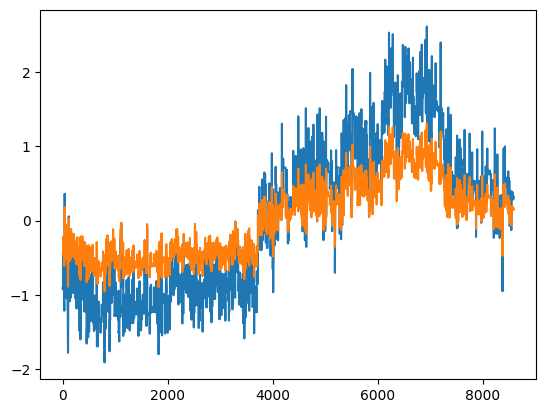

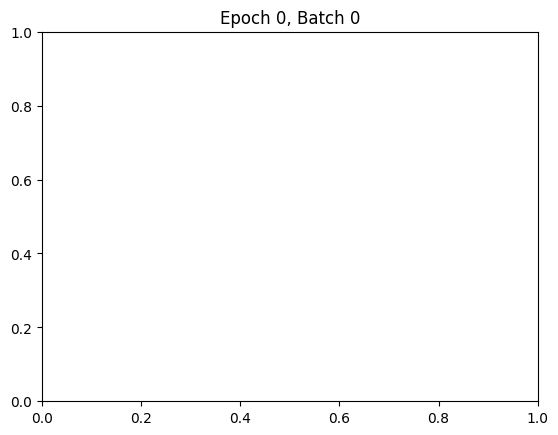

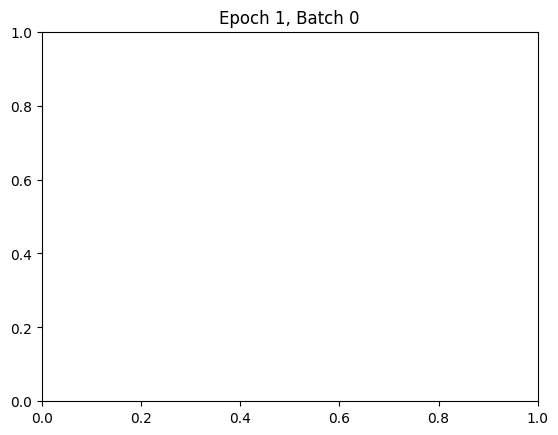

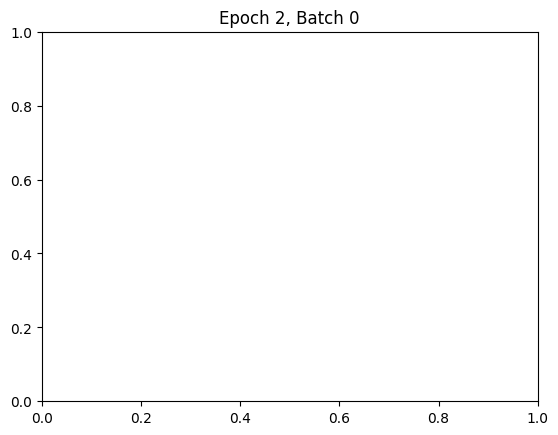

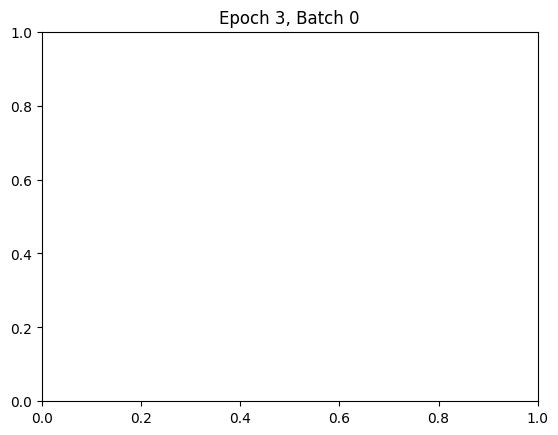

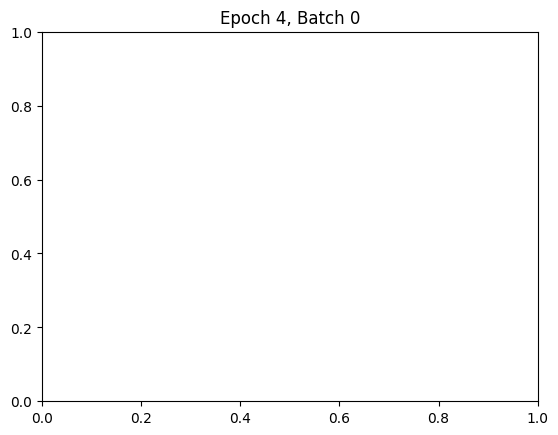

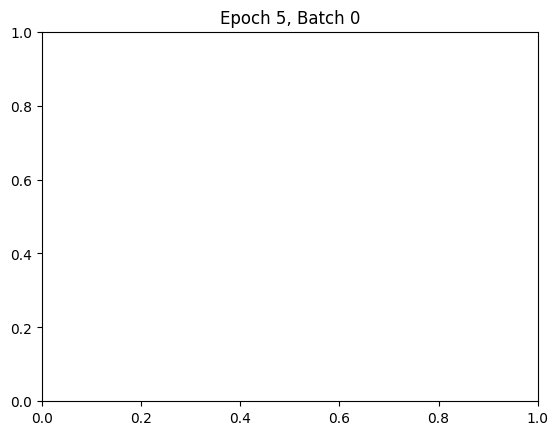

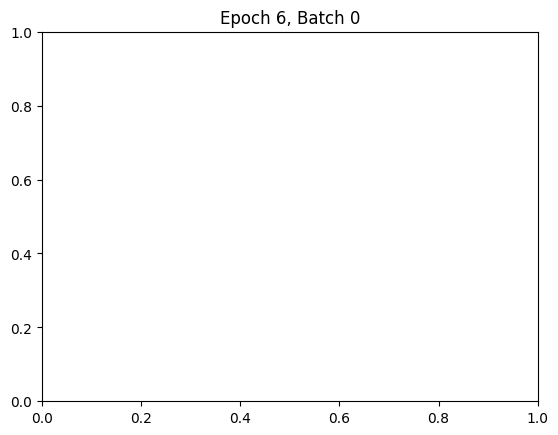

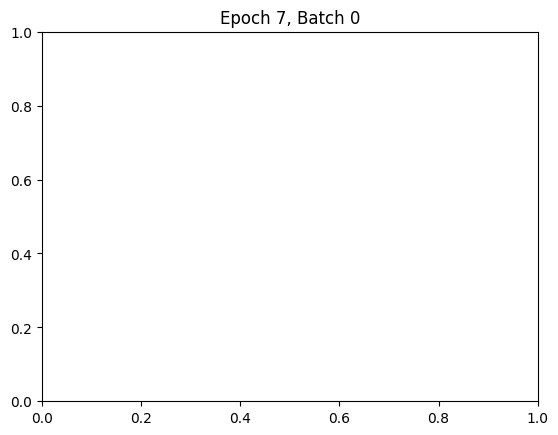

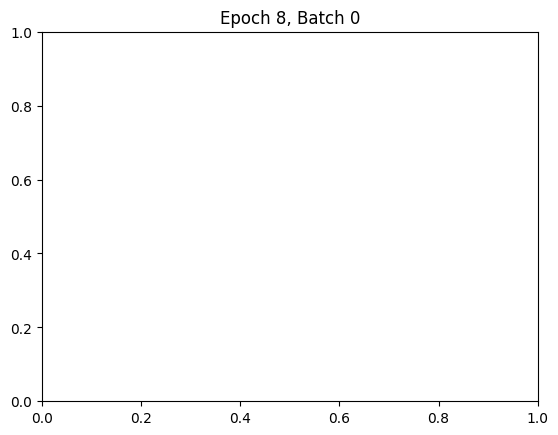

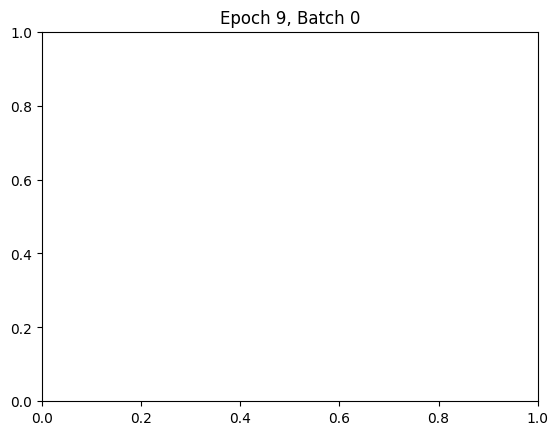

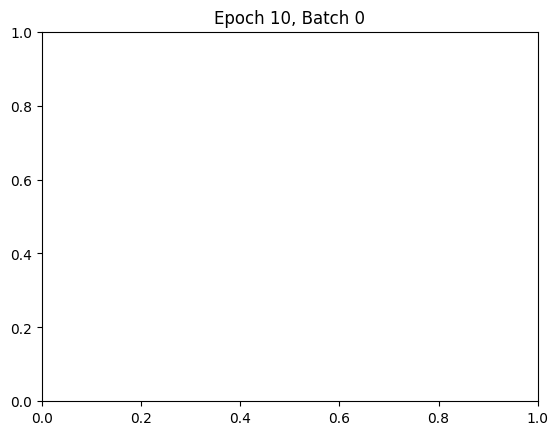

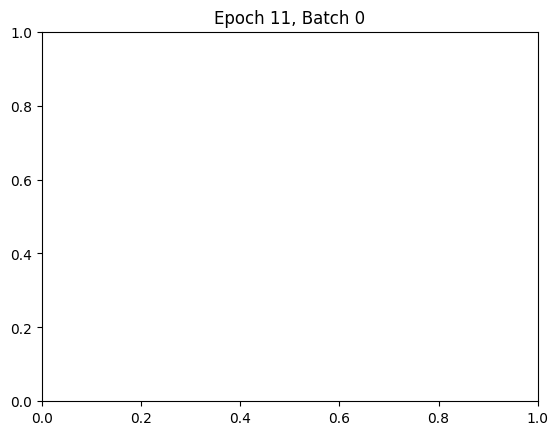

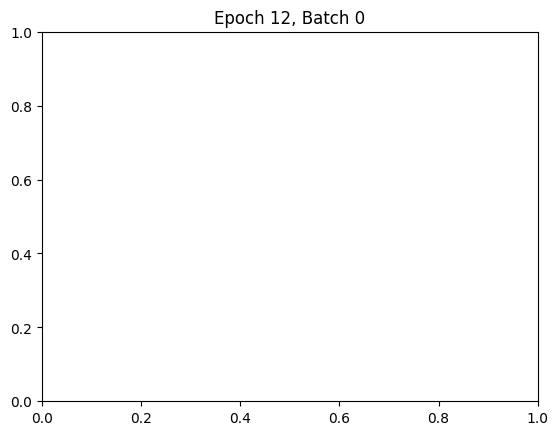

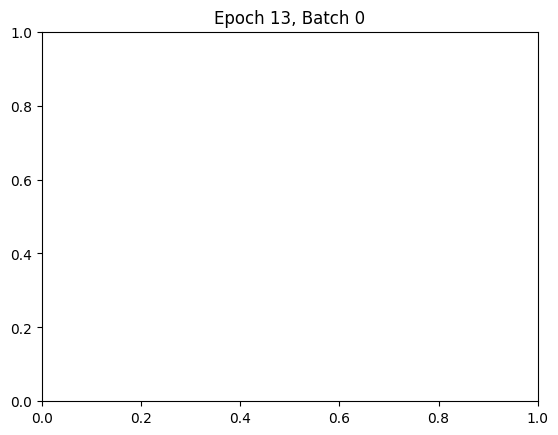

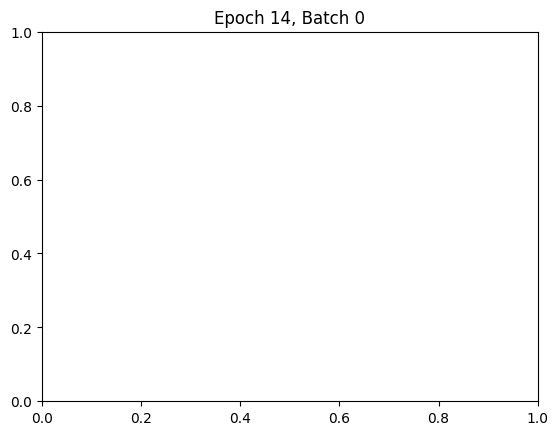

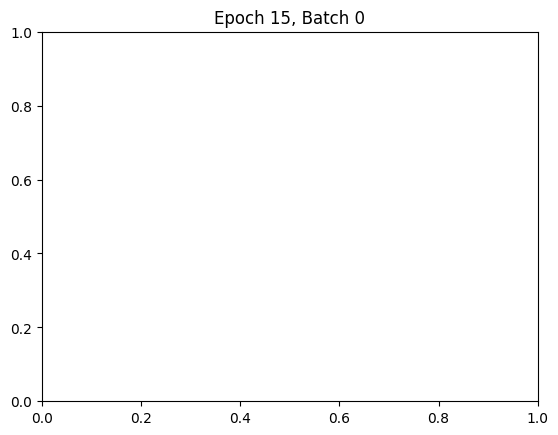

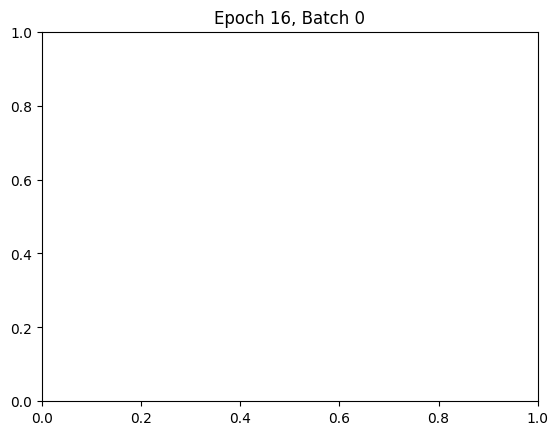

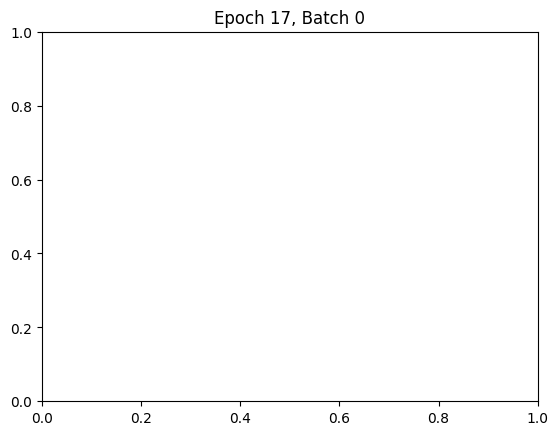

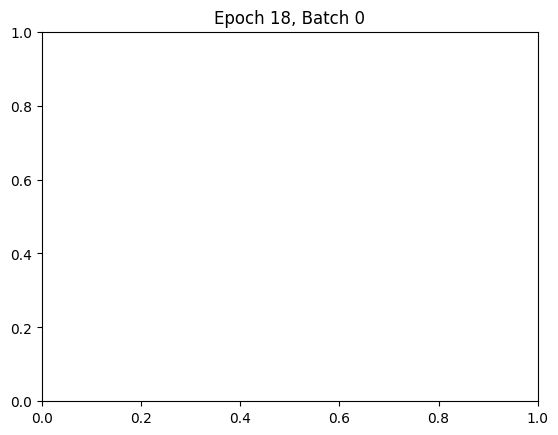

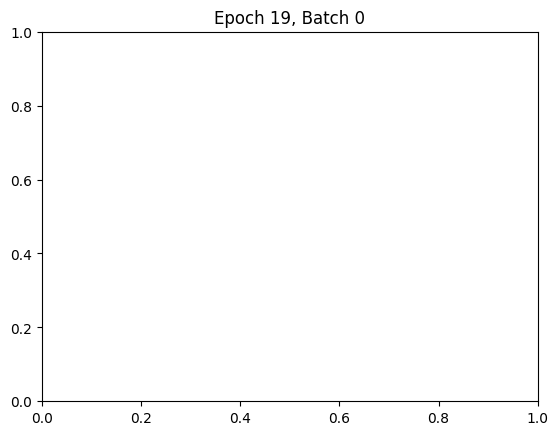

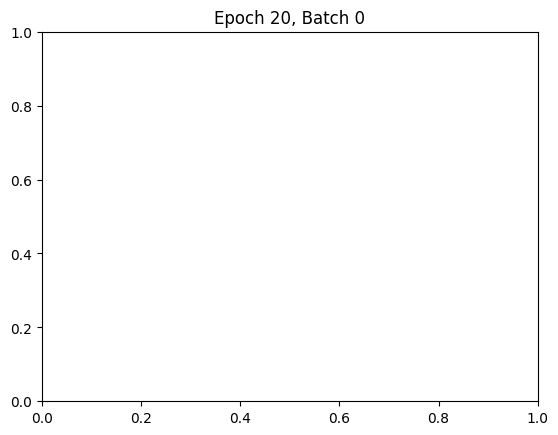

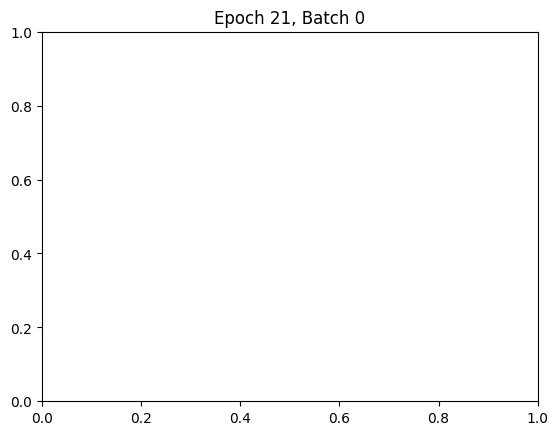

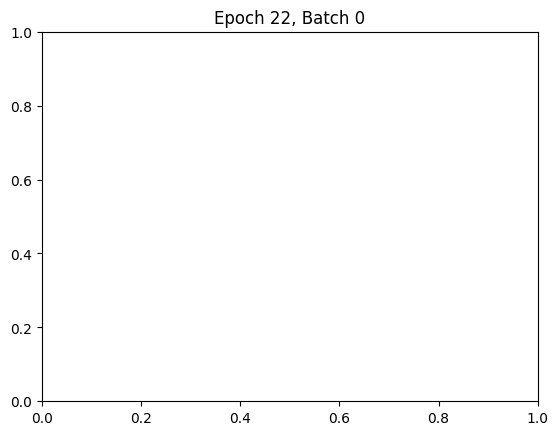

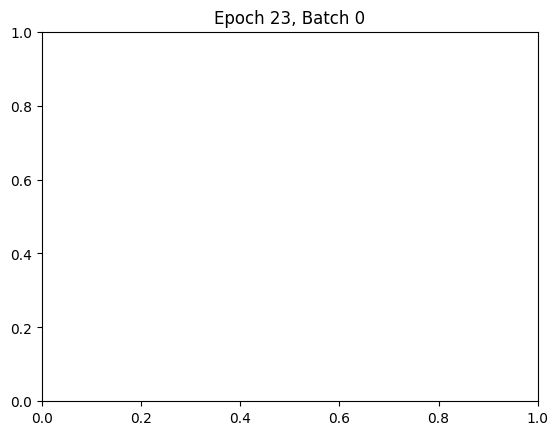

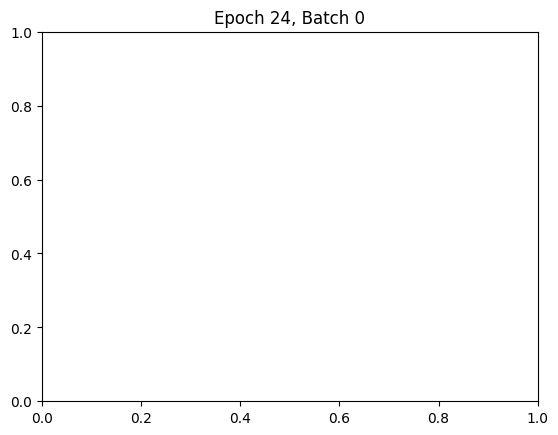

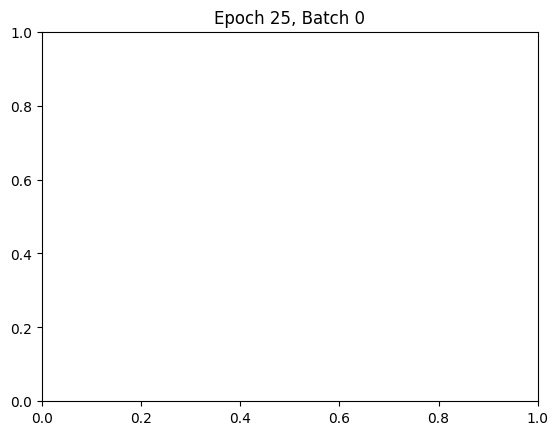

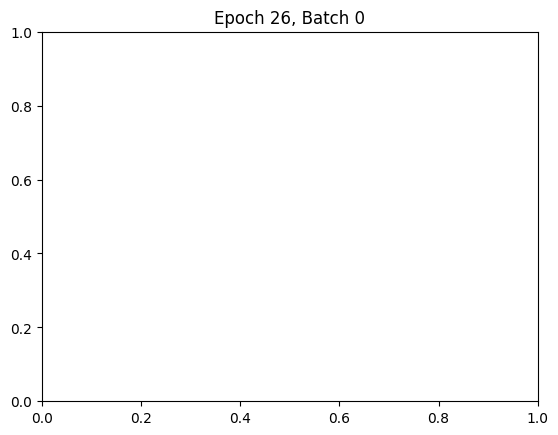

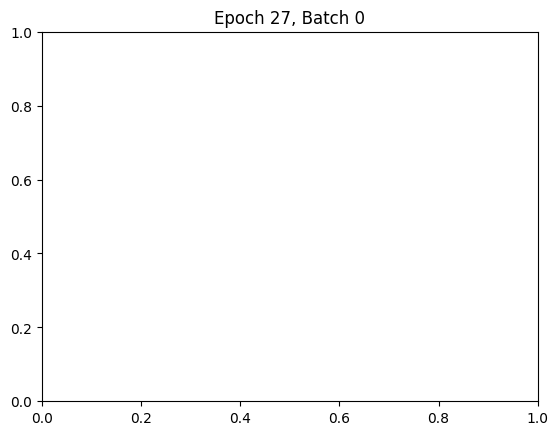

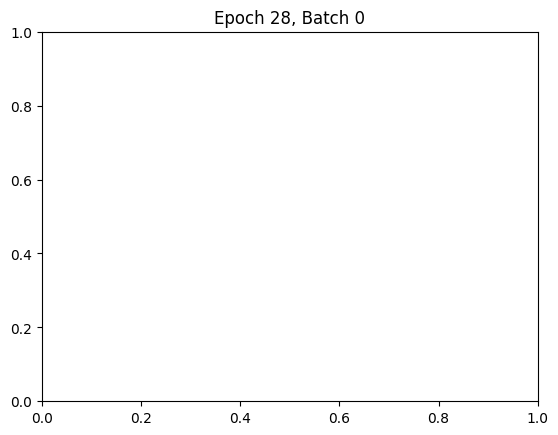

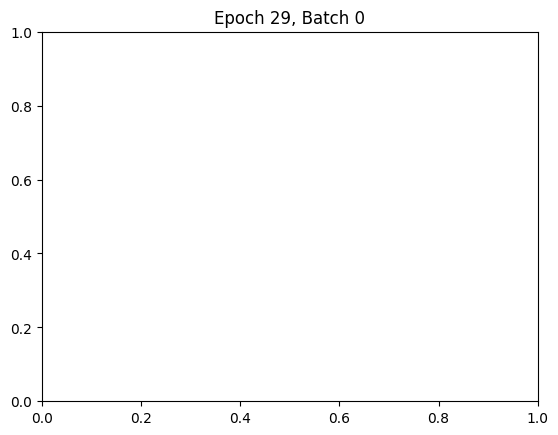

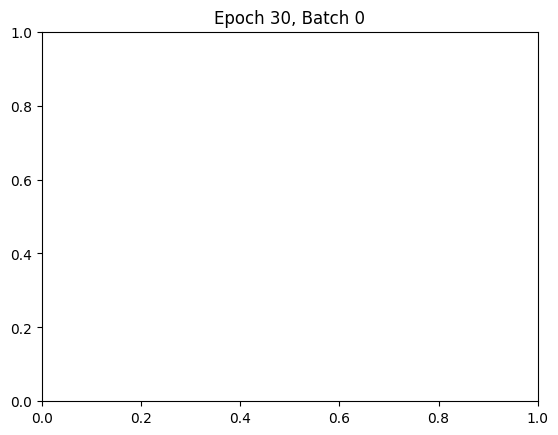

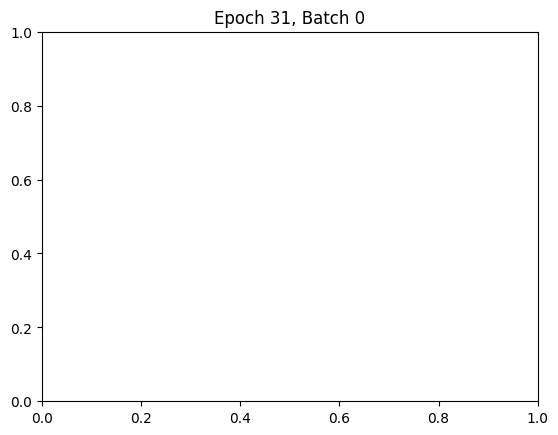

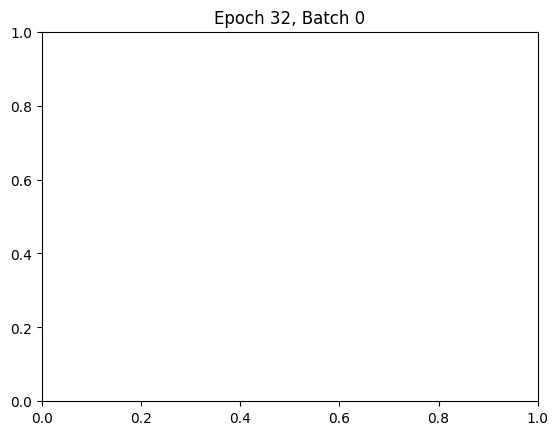

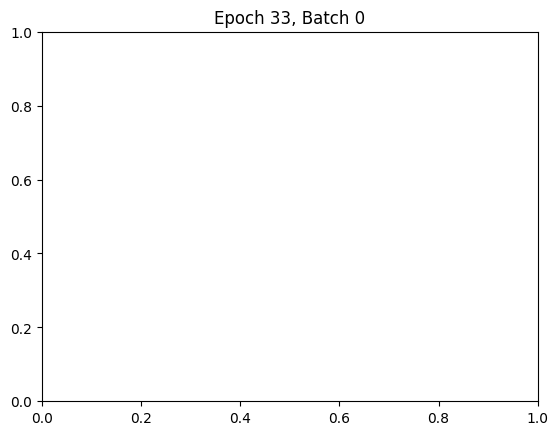

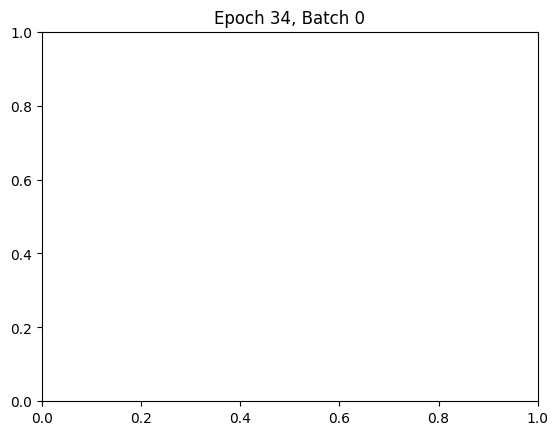

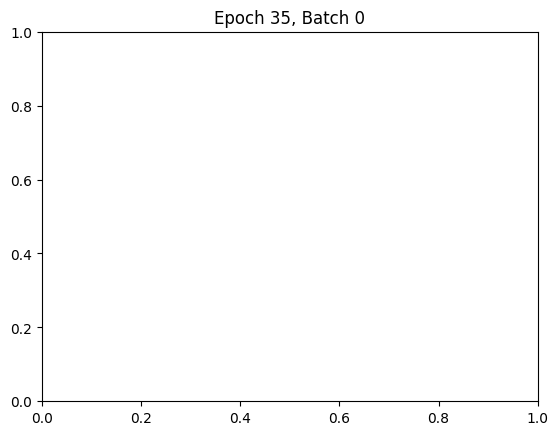

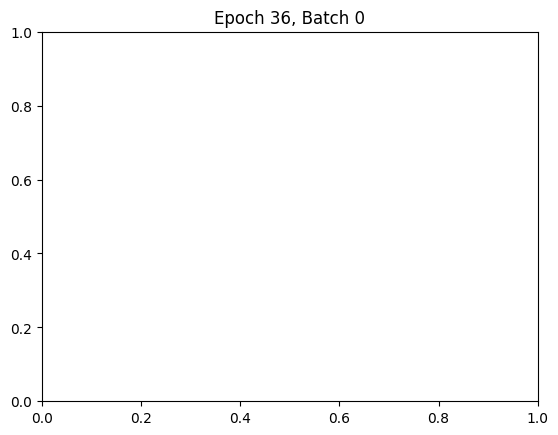

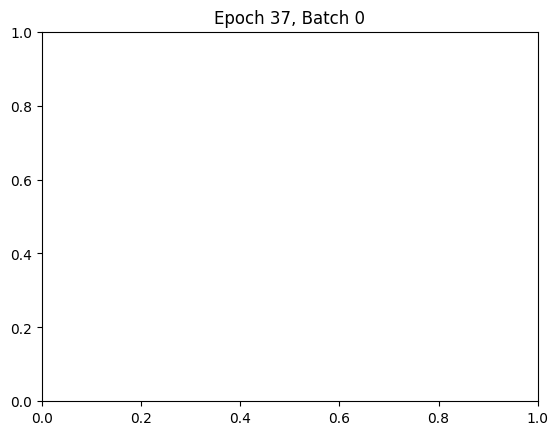

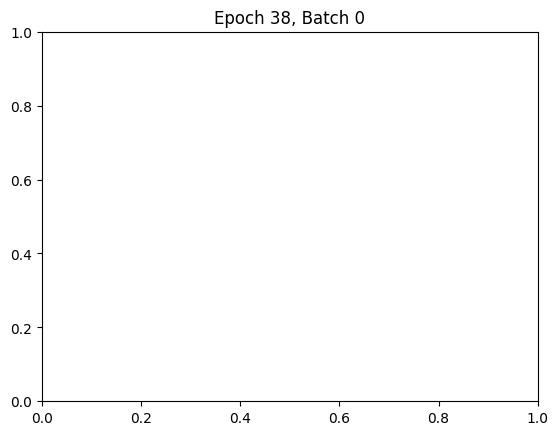

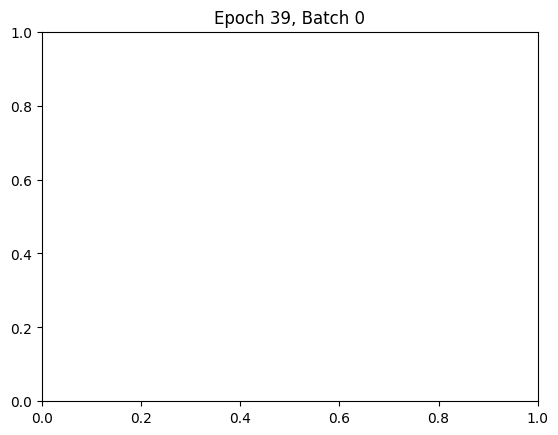

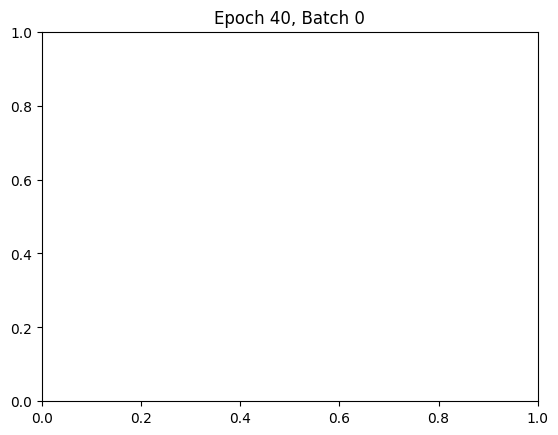

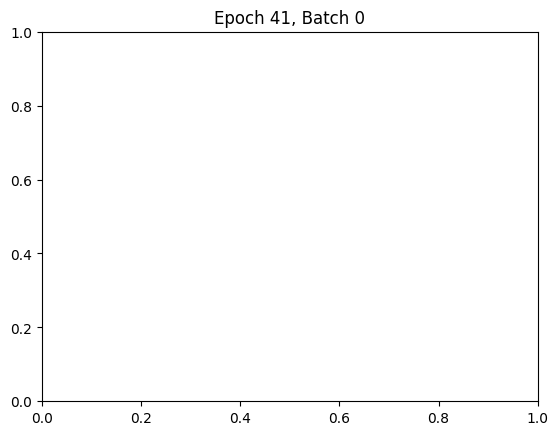

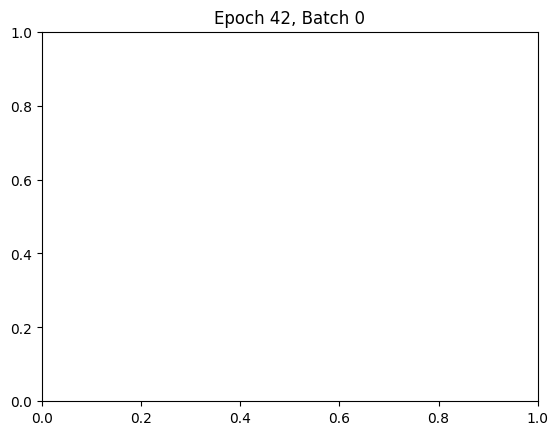

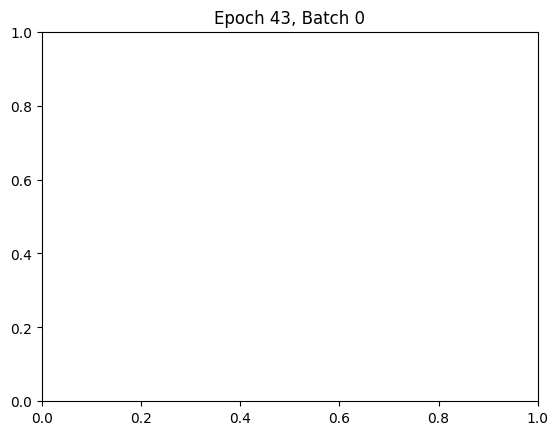

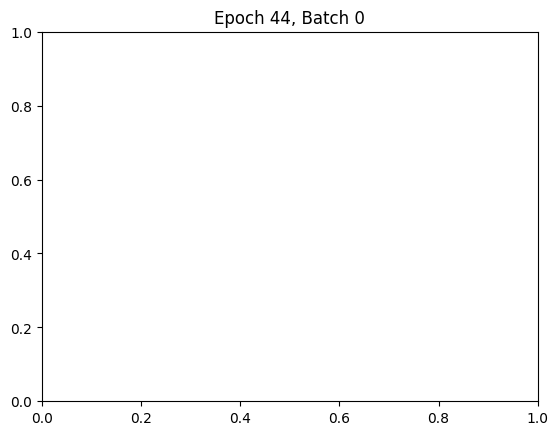

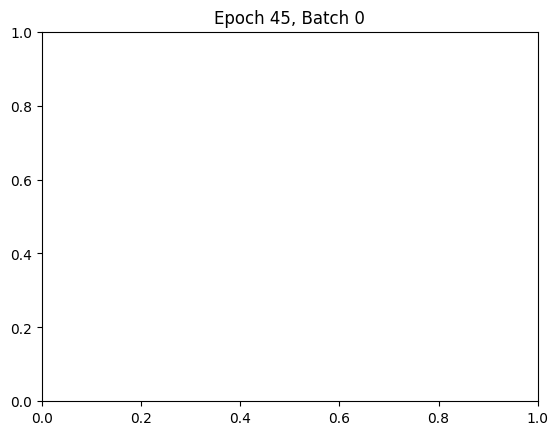

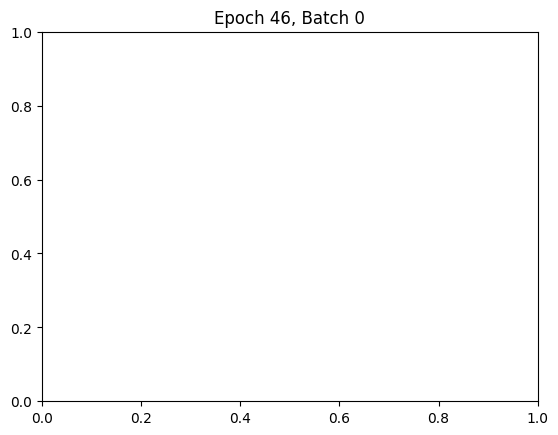

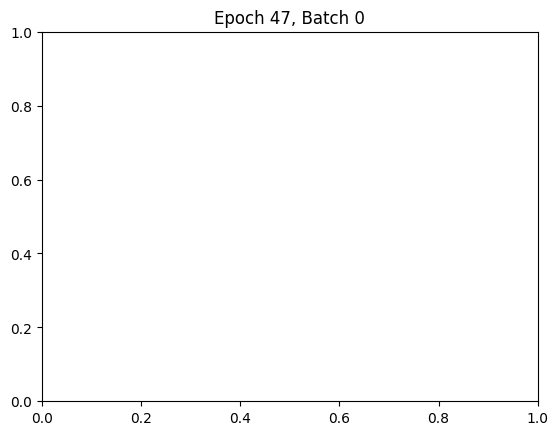

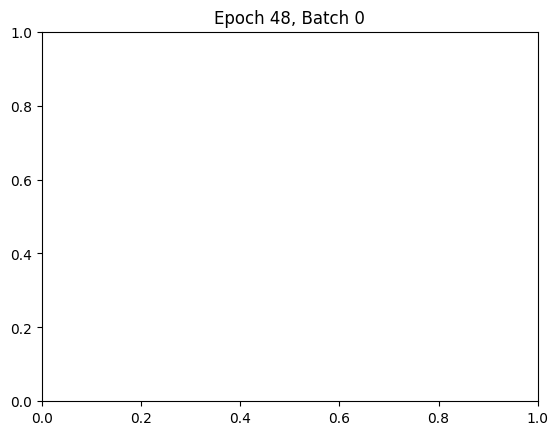

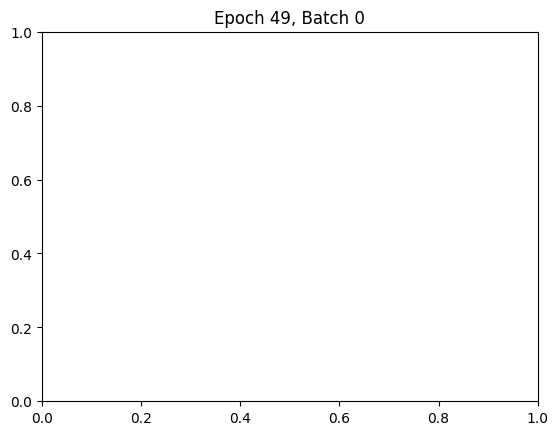

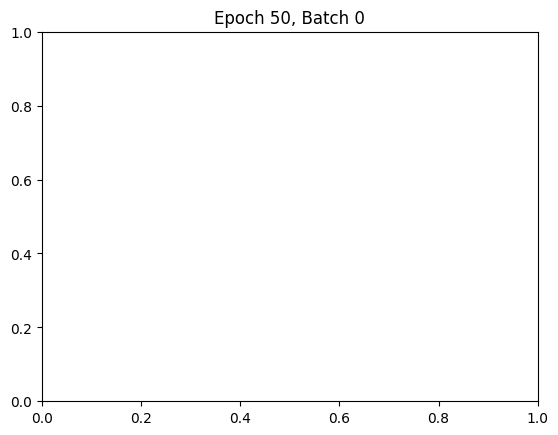

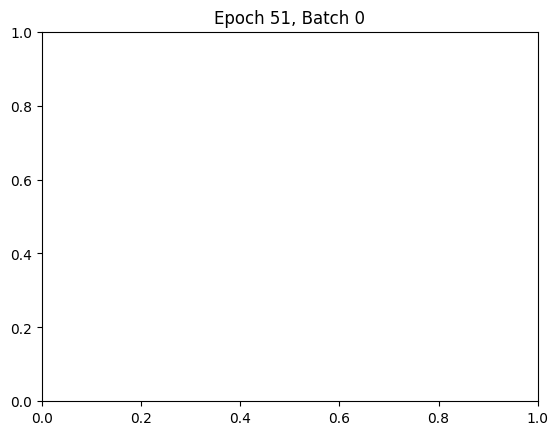

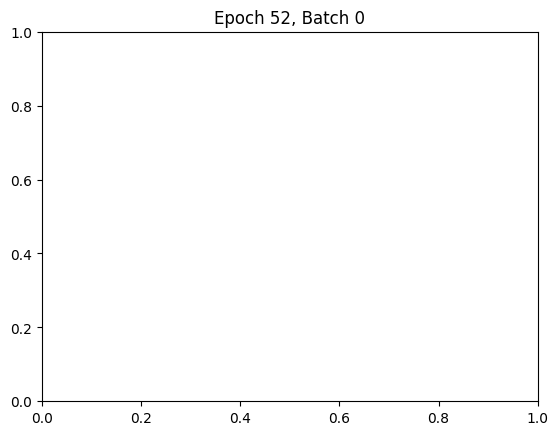

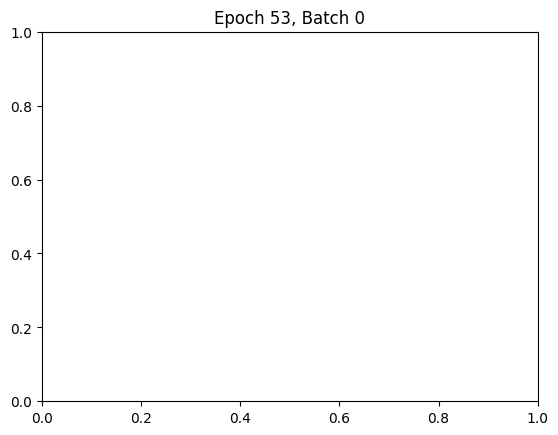

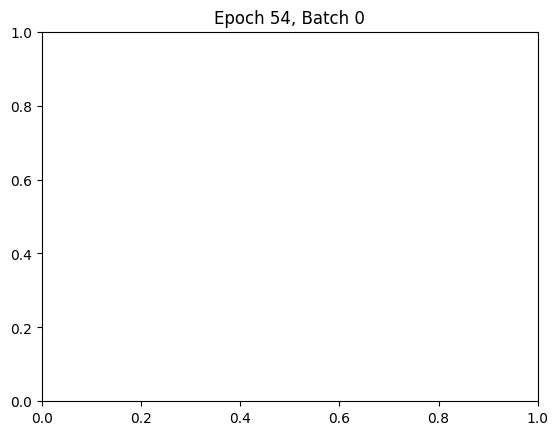

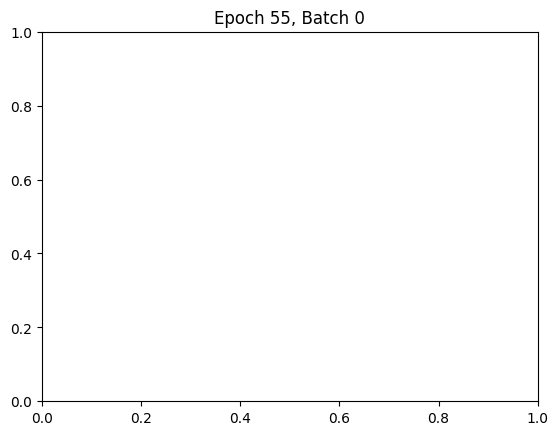

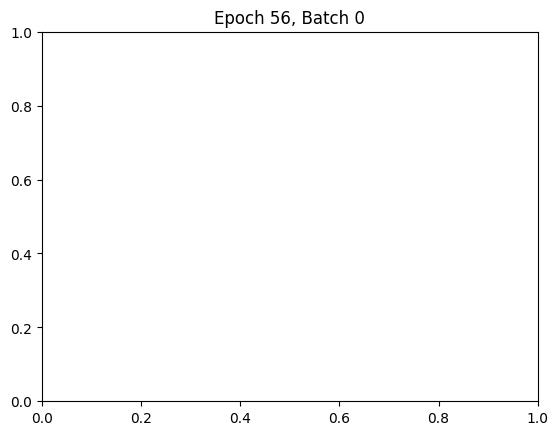

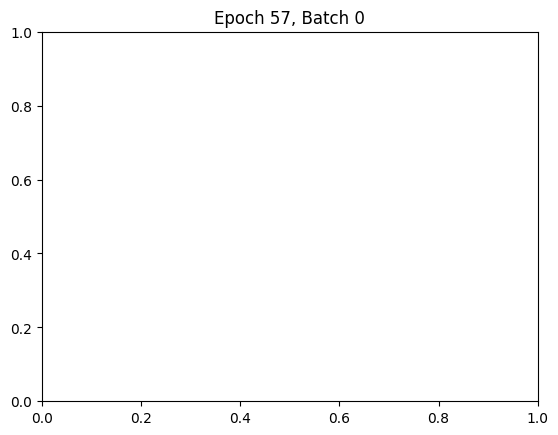

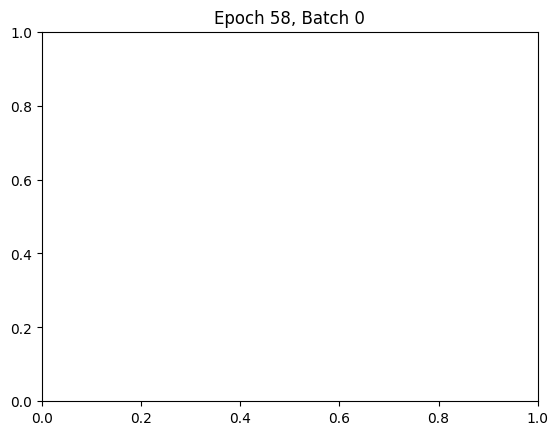

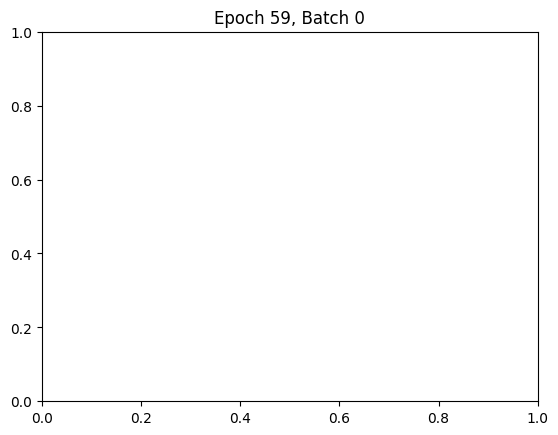

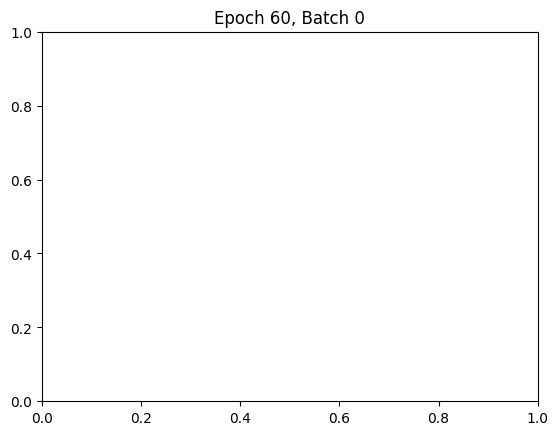

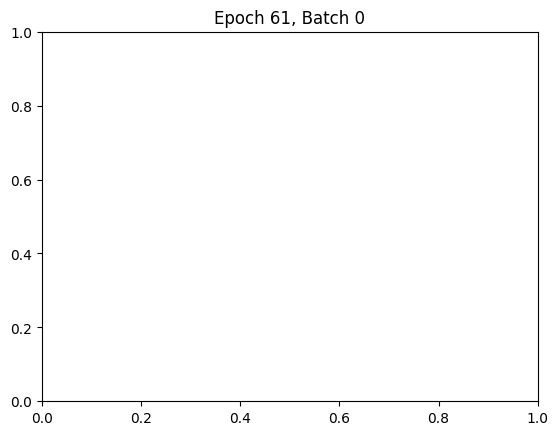

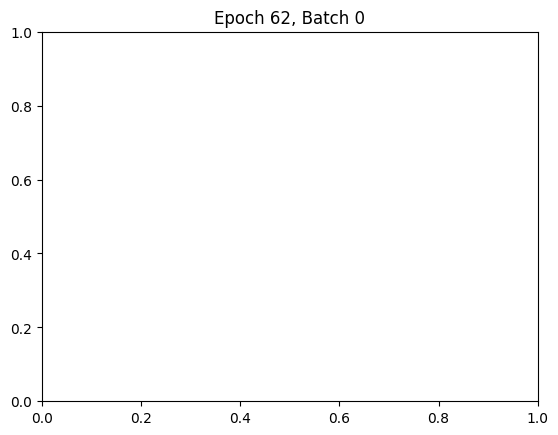

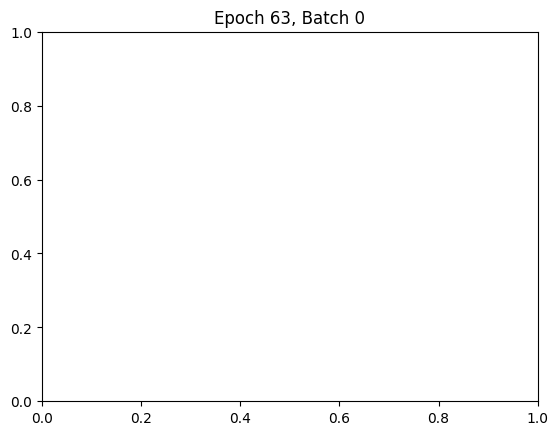

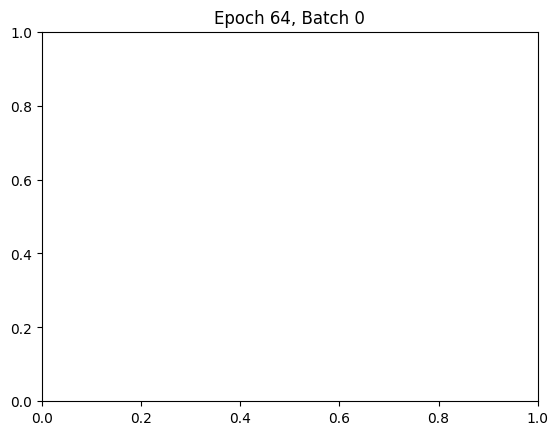

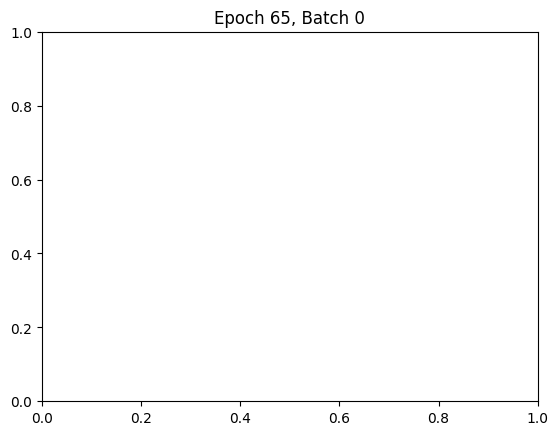

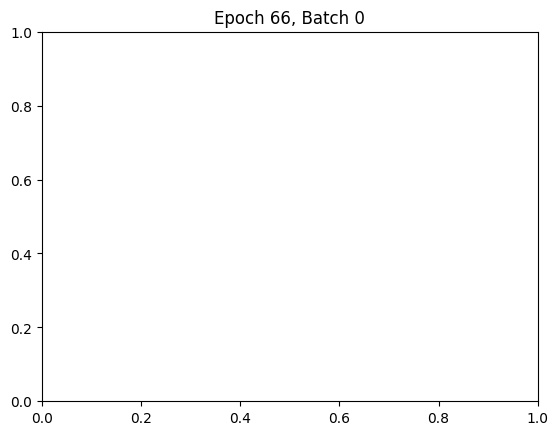

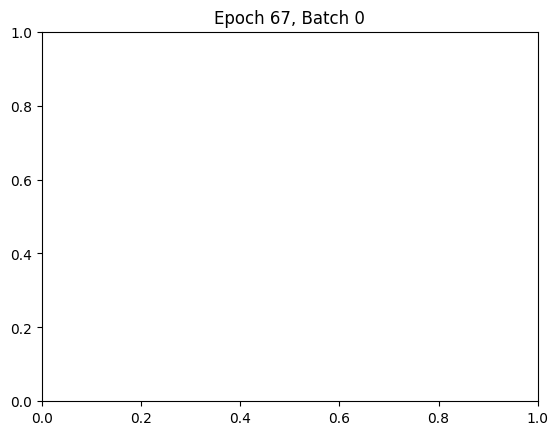

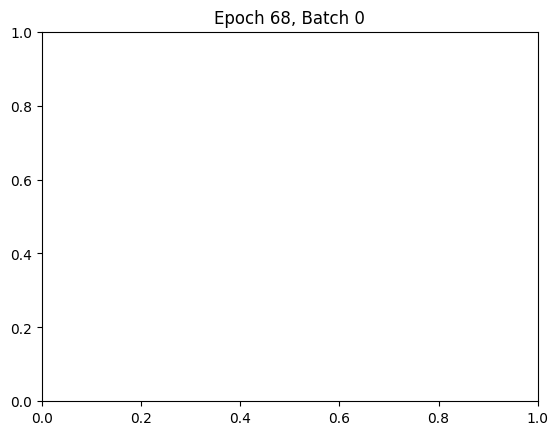

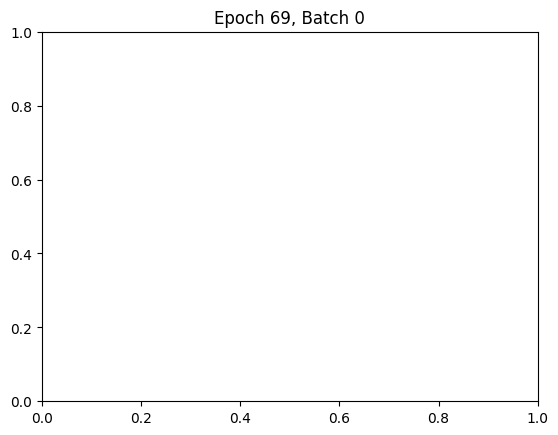

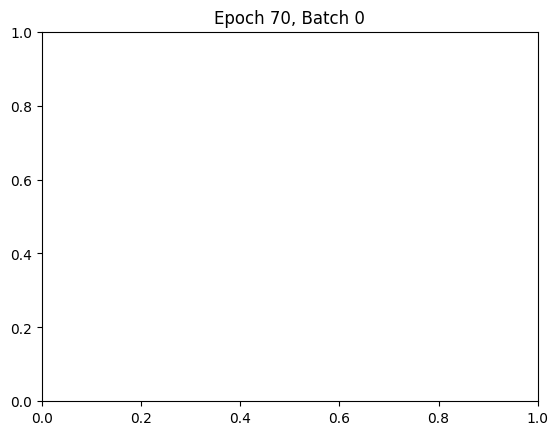

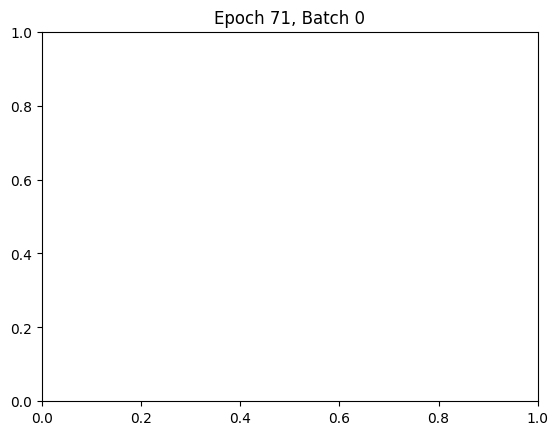

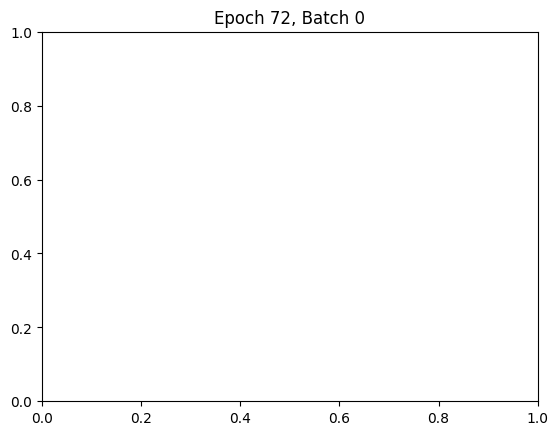

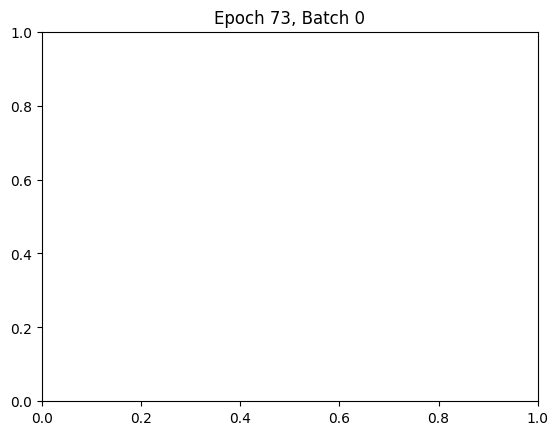

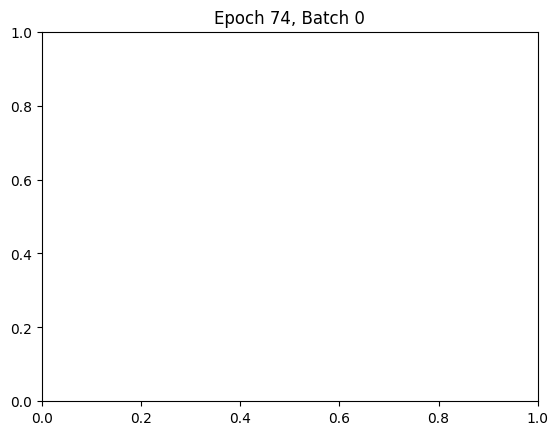

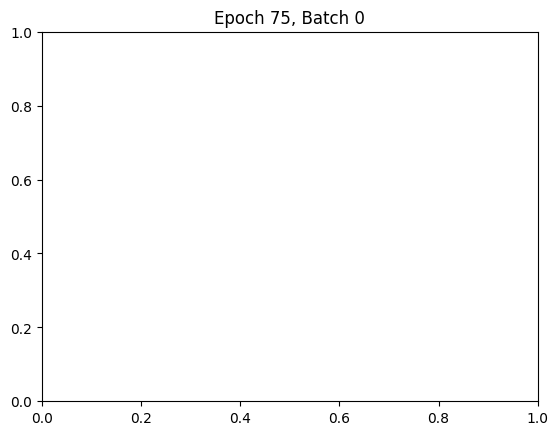

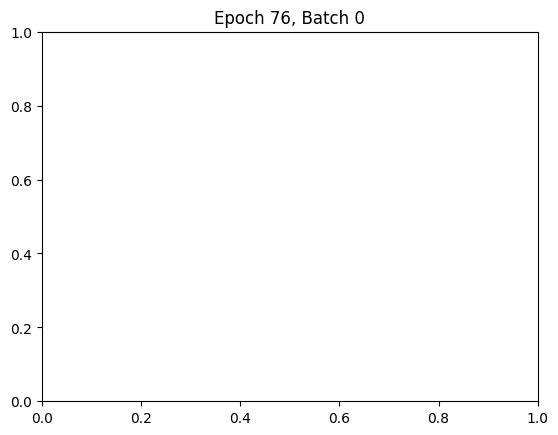

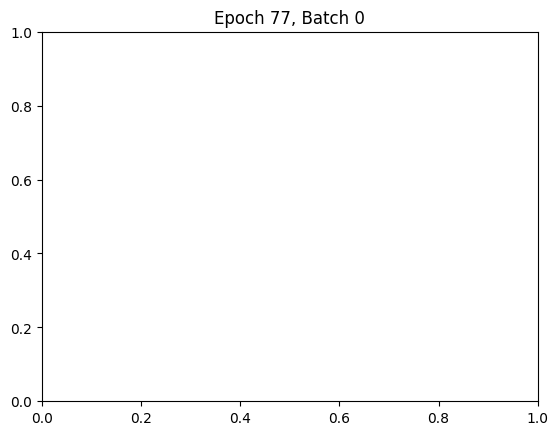

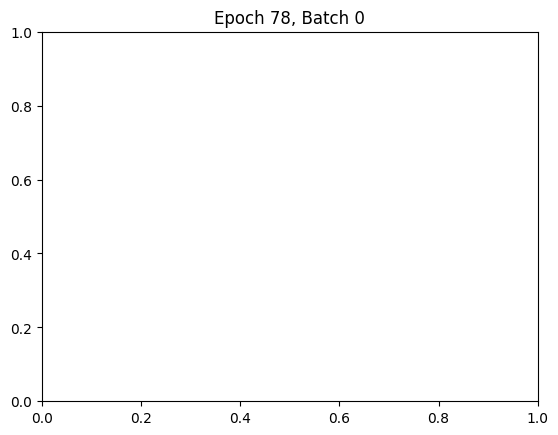

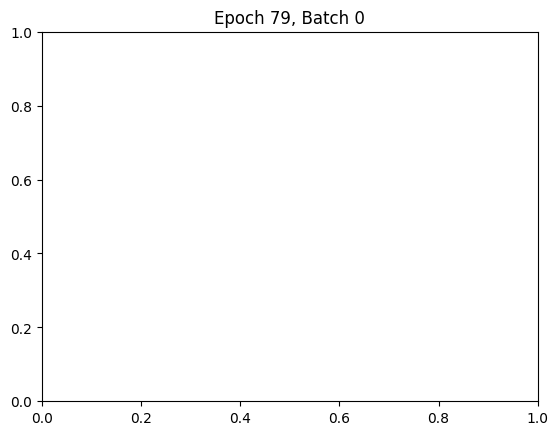

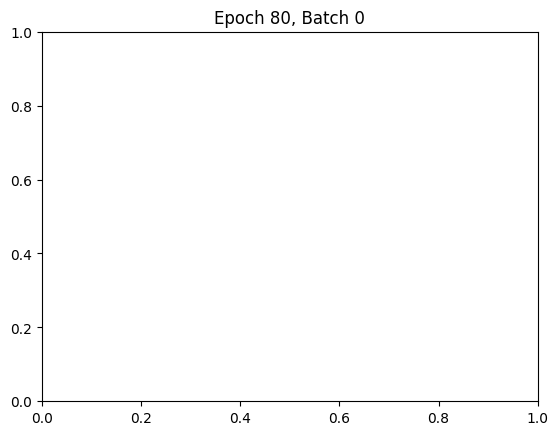

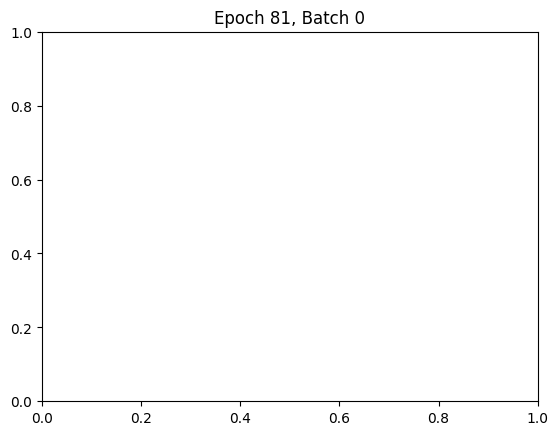

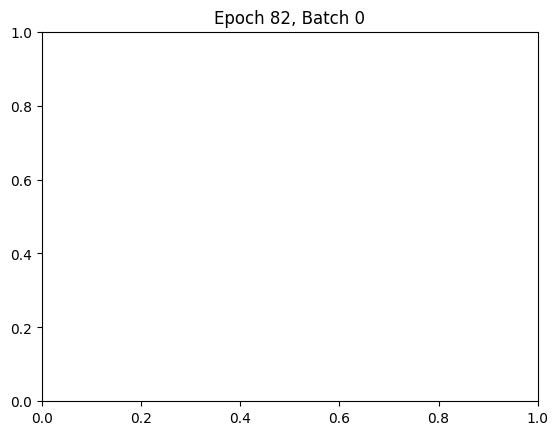

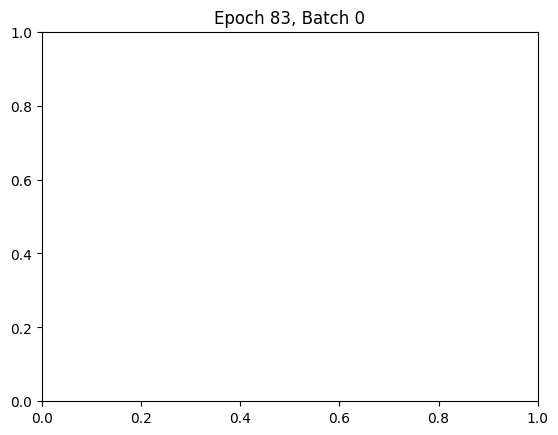

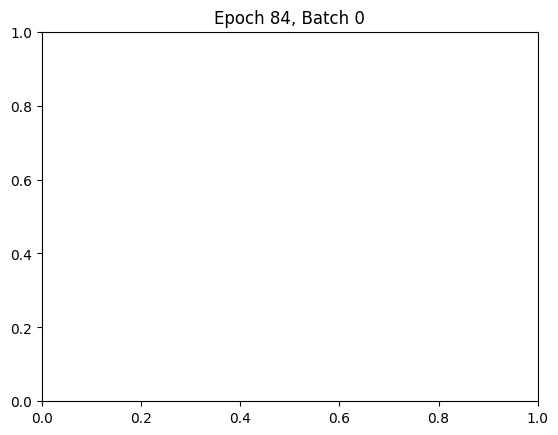

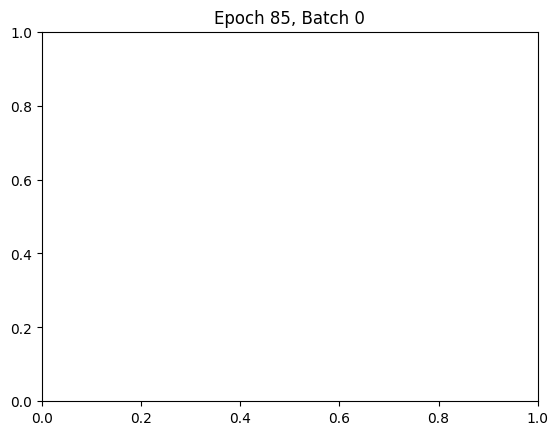

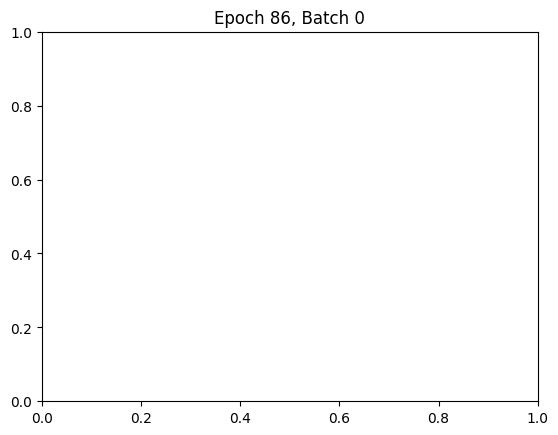

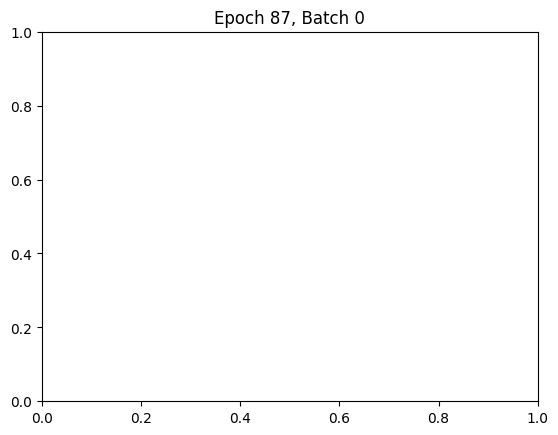

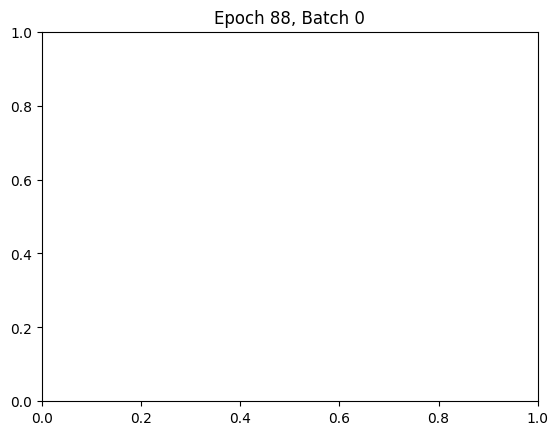

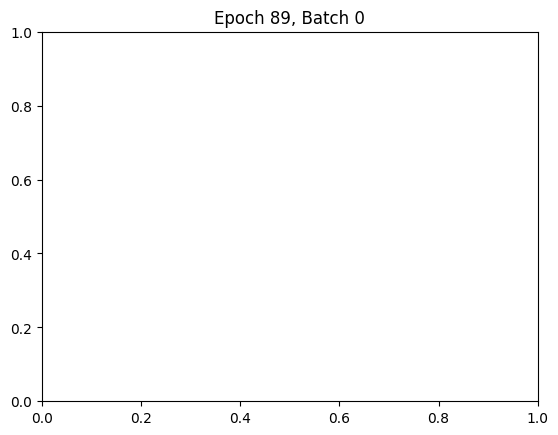

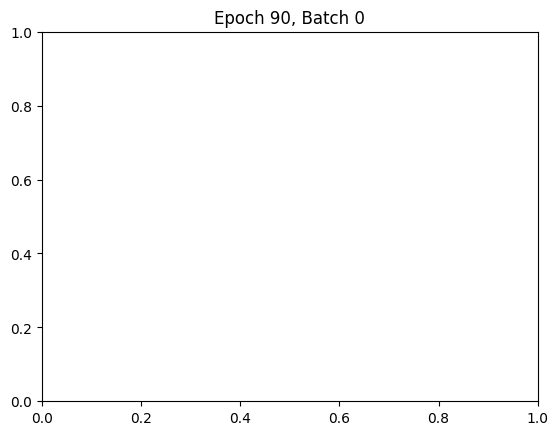

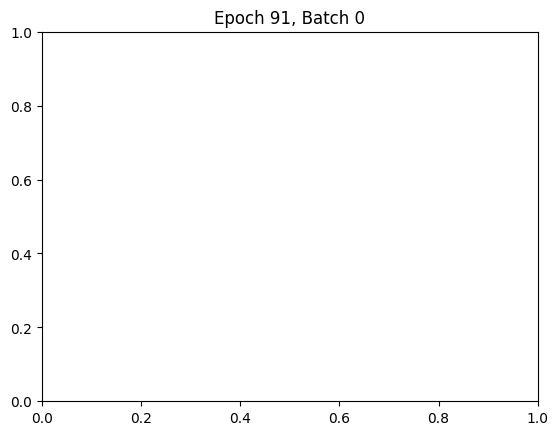

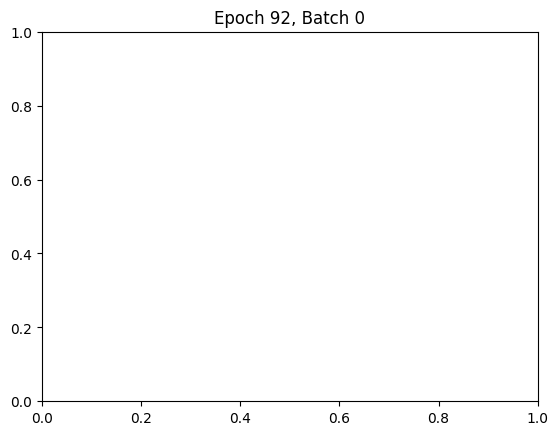

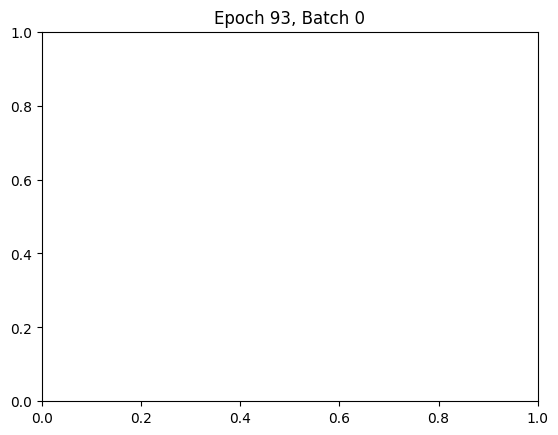

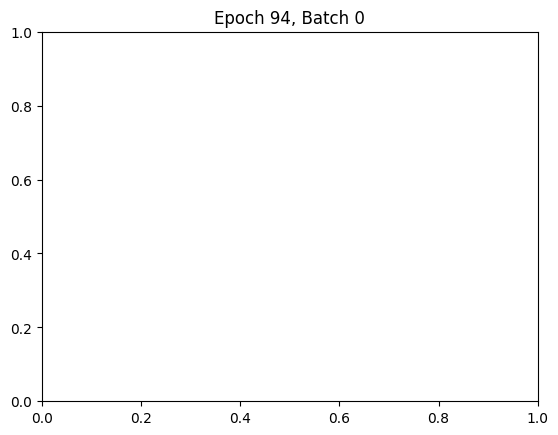

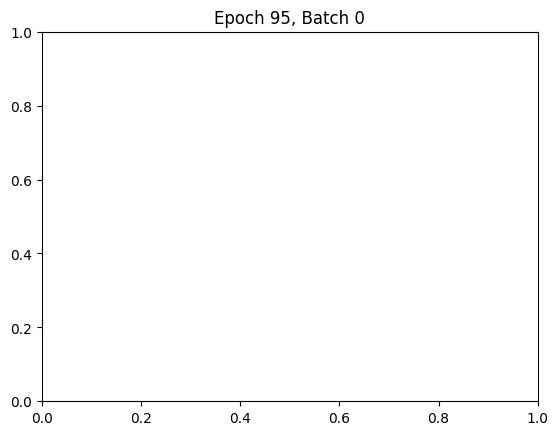

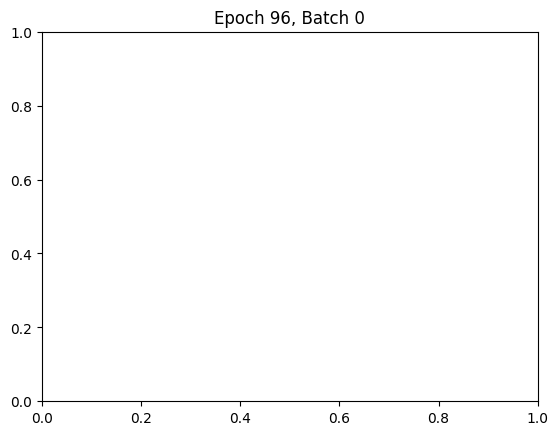

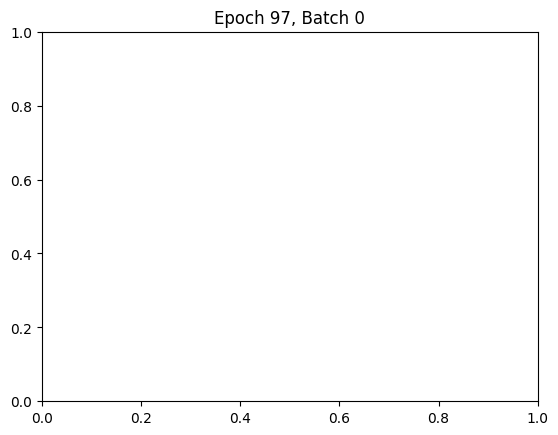

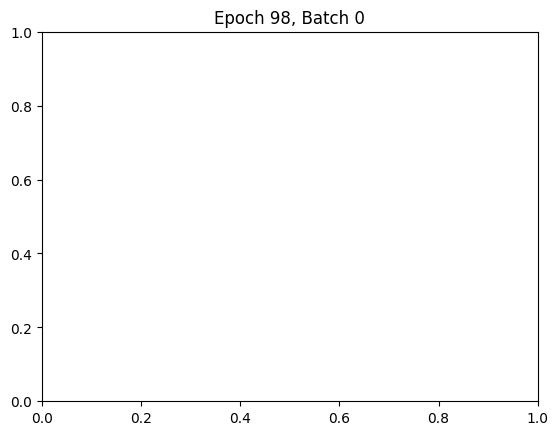

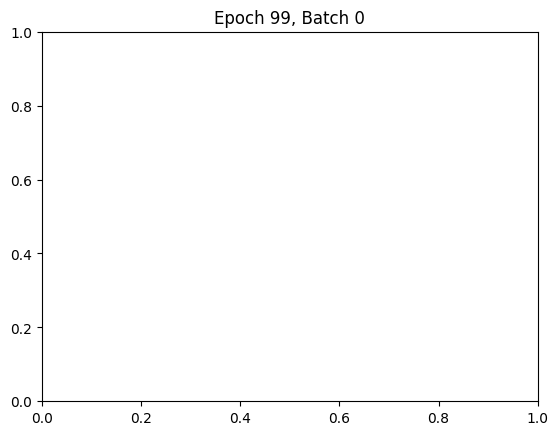

0.043661002


In [ ]:
import matplotlib.pyplot as plt
# Создание сессии
net = tf.Session()
# Запуск инициализатора
net.run(tf.global_variables_initializer())

# Настройка интерактивного графика
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Количество эпох и размер куска данных
epochs = 100
batch_size = len(y_train)

for e in range(epochs):

    # Перемешивание данных для обучения
    #shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    #X_train = X_train[shuffle_indices]
    #y_train = y_train[shuffle_indices]

    # Обучение мини-партией
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        #batch_y = np.expand_dims(batch_y, axis=-1)
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Показать прогресс
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            #file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            #plt.savefig(file_name)
            plt.pause(0.01)
# Вывести финальную фукнцию MSE после обучения
mse_final = net.run(mse, feed_dict={X: batch_x, Y: batch_y})
print(mse_final)

In [ ]:
np.expand_dims(batch_y, axis=0)
batch_y

In [ ]:
pred = net.run(out, feed_dict={X: X_test})
pred.shape, y_test.shape

((1, 8591), (8591,))

In [ ]:
y_test

array([-0.92067197, -0.89440319, -0.92067197, ...,  0.32133775,
        0.32133775,  0.32133775])

In [ ]:
preds = train_normalize_class.DeNormalizeData(net.run(out, feed_dict={X: X_test}), axes=[0])# + np.random.normal(size=test_data[:,42].shape)

In [ ]:
pred = pred.reshape(8591, 1).T[0]

In [ ]:
preds

array([[2190.91  , 2166.1853, 2155.2307, ..., 2142.886 , 2069.7822,
        2033.2509]], dtype=float32)

In [ ]:
#preds = np.array(eval_data['Сибирь']) - np.array(preds)
y_mean = np.array(y_test).reshape(357, 24)#(np.array(eval_data['Сибирь']) - np.array(eval_labels)).reshape(357, 24)
y_mean_r = []
for i in range(len(y_mean)):
  y_mean_r.append(y_mean[i].mean())
y_preds_mean = np.array(pred).reshape(357, 24)
y_preds_mean_r = []
for i in range(len(y_preds_mean)):
  y_preds_mean_r.append(y_preds_mean[i].mean())
y_mean_r = np.array(y_mean_r)
y_preds_mean_r = y_preds_mean_r = np.array(y_preds_mean_r)

#y_mean_r, y_preds_mean_r

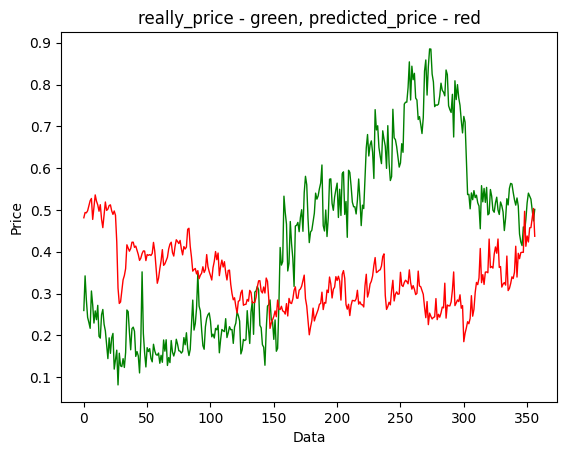

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y_mean_r, color="green", linewidth=1)
mtp.plot(y_preds_mean_r, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()

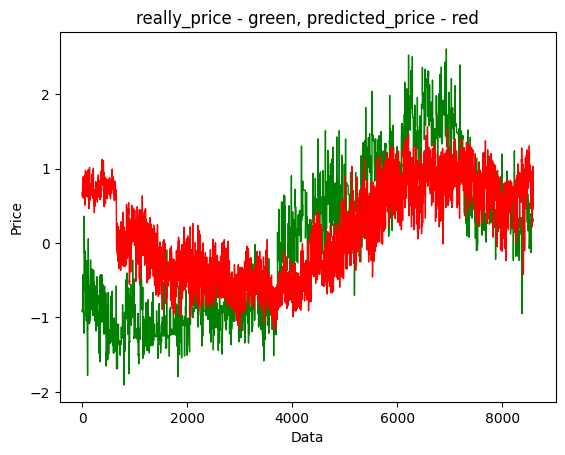

In [ ]:
pred = net.run(out, feed_dict={X: X_test})
pred = pred.reshape([8591, 1]).T[0]
import matplotlib.pyplot as mtp
mtp.plot(test_data[:, 42:], color="green", linewidth=1)
mtp.plot(pred, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()

In [ ]:
# Определяем функцию ошибки
def MAE(predictions: np.ndarray, labels: np.ndarray) -> float:
    return np.mean(np.abs(predictions - labels))

# Выводим значение ошибки
#print(MAE(train_normalize_class.DeNormalizeData(model(test_data[:, :42]).numpy().T[0], axes=[0]) + np.random.normal(size=test_data[:, 42].shape), test_data[:, 42:]))
print(MAE(net.run(out, feed_dict={X: X_test}), test_data[:, 42:]))

0.9886379776048313


# **Дополнительные эксперименты**

In [ ]:
# Метрика 1
a = abs(abs(y_mean_r) - abs(y_preds_mean_r))
r = sum(a)/a.size
r = r/a.max() * 100
print(f'Accuracy: {r} %')

Accuracy: 24.962896797902037 %


In [ ]:
# Метрика 2
r = []
for y, p in zip(y_mean_r, y_preds_mean_r):
  if y/p > 1:
    r.append(abs(p/y))
  else:
    r.append(abs(y/p))
r = np.array(r)
r = sum(r)/r.size * 100
print(f'Accuracy: {r} %')

Accuracy: 96.08563131334122 %


In [ ]:
import torch
torch.__version__

KeyboardInterrupt: ignored

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
def load_data():
  return train_data, train_labels, eval_data, eval_labels


In [ ]:
X, y, a, b = load_data()

In [ ]:
X_tensor.shape, y_tensor.shape

In [ ]:
y_tensor = torch.from_numpy(np.array(y).reshape(-1, 1)).float()
#X_tensor = torch.from_numpy(np.array(X).reshape(-1, 1)).float()

In [ ]:
X_tensor = torch.Tensor([np.array(X)])[0]
#y_tensor = torch.Tensor([np.array(y_tensor)])[0]

In [ ]:
X_tensor.shape, y_tensor.shape

In [ ]:
from torch import nn, optim

epochs = 100

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(54, 500)
        self.fc2 = nn.Linear(500, 1)

    def forward(self, x):
        x = self.fc1(x)                          # выход первого слоя
        x = self.fc2(x)                          # выход второго слоя
        return x

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)#, momentum=0.8)

for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(X_tensor)
    loss = criterion(predictions, y_tensor)
    # get gradients
    loss.backward()
    # update parameters
    optimizer.step()

    if (epoch + 1) % (epochs / 10) == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
preds = model(torch.Tensor(np.array(eval_data))).detach().numpy()

In [ ]:
preds

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.Tensor([train_data['Сибирь'].values])
Y = torch.Tensor([train_labels.values])

# defining the function for forward pass for prediction
def forward(x):
    return w * x

# evaluating data points with Mean Square Error
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

w = torch.tensor(-10.0, requires_grad=True)

step_size = 0.1
loss_list = []
iter = 20

for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
X = train_data['Сибирь'][:1000]

size = int(len(X) * 0.66)
#size
#(train_data['Сибирь'] - train_labels)
len(test)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
#def parser(x):
 #return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
#series.index = series.index.to_period('M')
# split into train and test sets
X = train_data['Сибирь'][:1000]
X = series.values
Y = (train_data['Сибирь'] - train_labels)[:34]
Y = Y.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(Y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(train_data, label=train_labels)
dtest = dtrain

In [ ]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [ ]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [ ]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

In [ ]:
eval_data.values[0]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
                       #random_state=0, shuffle=False)
X = train_data.values
y = train_labels.values
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

In [ ]:
a = []
b = []
for i in range(len(eval_labels.values)):
  a.append(regr.predict([eval_data.values[i]]))
  b.append(eval_labels.values[i])

import matplotlib.pyplot as mtp
mtp.plot(b, color="green", linewidth=1)
mtp.plot(a, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

In [ ]:
import numpy as np
import tensorflow as tf

# Create some example data
X_train = train_data
y_train = train_labels

# Define model parameters
learning_rate = 0.01
training_epochs = 14

# Define the linear regression model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(54, input_shape=(54,), activation='linear'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(300, activation='linear'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(5, activation='linear'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(1, activation='linear')
])
# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

# **Эксперимент с временными рядами**

In [ ]:
# Импорт библиотек
from datetime import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

'''# Выгрузка данных из таблицы с тренировочными данными
train_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/DailyDelhiClimateTrain.csv").values

# Выгрузка данных из таблицы с тестовыми данными
test_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/DailyDelhiClimateTest.csv").values'''

# Выгрузка данных из таблицы с тренировочными данными
train_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train_data_r.csv", header=None).values

# Выгрузка данных из таблицы с тестовыми данными
test_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test_data_r.csv", header=None).values

<ipython-input-111-c14898417fac>:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train_data_r.csv", header=None).values


In [ ]:
train_data: np.ndarray = pd.DataFrame(train_data).dropna(axis=0).values
test_data: np.ndarray = pd.DataFrame(test_data).dropna(axis=0).values
test_data

array([['index', 'Европа', 'Сибирь', ..., 'Скорость ветра Current 0',
        'Gaz_price 0', 'y'],
       ['2022-12-05 00:00:00.000', '1585.603112840467',
        '976.010101010101', ..., '2.0', '2349.61', '972.9285714285714'],
       ['2022-12-05 01:00:00.000', '1588.9377431906614',
        '978.4141414141416', ..., '3.0', '2349.61', '975.3571428571428'],
       ...,
       ['2023-11-27 21:00:00.000', '1602.9645669291338',
        '1093.6756756756756', ..., '3.0', '1311.82',
        '1087.7534246575342'],
       ['2023-11-27 22:00:00.000', '1596.3425196850394',
        '1093.6756756756756', ..., '3.0', '1311.82',
        '1087.7534246575342'],
       ['2023-11-27 23:00:00.000', '1597.2952755905512',
        '1093.6756756756756', ..., '4.0', '1311.82', '1138.849315068493']],
      dtype=object)

In [ ]:
def time_st(date_str: str) -> str:
  return date_str[:13]

In [ ]:
train_data[:, :1]

array([['2019-01-01 00'],
       ['2019-01-01 01'],
       ['2019-01-01 02'],
       ...,
       ['2022-11-18 02'],
       ['2022-11-18 03'],
       ['2022-11-18 04']], dtype=object)

In [ ]:
train_data[:, :1] = np.vectorize(time_st)(train_data[:, :1])
test_data[:, :1] = np.vectorize(time_st)(test_data[:, :1])

In [ ]:
def days_since_zero_date(date_str: str) -> int:
    # Преобразование строки в объект datetime
    date_format: str = "%Y-%m-%d %H"
    date_obj = datetime.strptime(date_str, date_format)

    # Нулевая дата
    zero_date = datetime.strptime("2019-01-01 00", date_format)

    # Вычисление разницы в днях
    delta = date_obj - zero_date
    days = delta.days

    return days

In [ ]:
train_data = train_data[1:-1]
test_data = test_data[1:-1]

In [ ]:
train_data = train_data[:17520]

In [ ]:
# Применяем ранее определенную функцию ко всем датам датасета
train_data[:, :1] = np.vectorize(days_since_zero_date)(train_data[:, :1])
test_data[:, :1] = np.vectorize(days_since_zero_date)(test_data[:, :1])

train_data = train_data.astype("float")
test_data = test_data.astype("float")

In [ ]:
print(train_data[0])
# Вывод - [0 10.0 84.5 0.0 1015.6666666666666]
# Видно, что все даты превратились в дни

[ 0.00000000e+00  1.32584848e+03  9.28101449e+02  8.83671000e+03
  2.47263500e+04  1.22577200e+04  2.98110200e+04  2.69163500e+04
  1.18813600e+04  1.16302600e+04  2.43312700e+04  1.37940100e+04
  3.24028400e+04  2.65962600e+04  1.18240400e+04  5.02800000e+03
  1.18100000e+03  5.28268100e+03  0.00000000e+00  8.61701400e+03
  1.57151360e+04  4.32530000e+03  1.00000000e+00  1.17500000e+03
  8.29271300e+03  1.49300000e+03  0.00000000e+00  2.94700000e+02
  3.06151390e+04  1.12140000e+04  8.93000000e+00  1.53733330e+04
  4.26500000e+03  1.00000000e+01  1.92464900e+03  5.62439000e+03
  0.00000000e+00 -1.20000000e+01  7.73900000e+02  8.50000000e+01
  2.00000000e+00  4.82420000e+02  9.34029412e+02]


In [ ]:
class Normalize:
    def __init__(self, data: np.ndarray) -> None:
        self.data: np.ndarray = np.copy(data) # Записываем копию данных

        # Вычисляем среднее по каждому столбцу
        self.__mean: np.ndarray = data.mean(axis=0)
        # Вычисляем стандартное отклонение по каждому столбцу
        self.__std_dev: np.ndarray = data.std(axis=0)

    def normalizeData(self) -> np.ndarray:
        # Возврат нормализованных даннах по формуле
        return (self.data - self.__mean) / self.__std_dev

    def DeNormalizeData(
        self, normalized_data: np.ndarray, axes: list[int] = [x for x in range(0, 44)]
    ) -> np.ndarray:
        # Денормализация днанных по указанной оси
        return normalized_data * self.__std_dev[axes] + self.__mean[axes]

# Нормализация температуры
train_normalize_class = Normalize(train_data)#[:, 42:])
train_data = train_normalize_class.normalizeData()

In [ ]:
train_data#[:, 42]

array([[-1.73153485, -1.62620835, -0.09906762, ..., -0.87562842,
        -0.51577968, -0.02406854],
       [-1.73153485, -1.58491601, -0.09906762, ..., -1.36039181,
        -0.51577968, -0.02406854],
       [-1.73153485, -1.4772094 , -0.09906762, ..., -1.36039181,
        -0.51577968, -0.16650104],
       ...,
       [ 1.73331759,  0.2033864 ,  0.60211386, ..., -1.36039181,
         0.95185611,  0.29555566],
       [ 1.73331759,  0.30801253,  0.60211386, ..., -1.36039181,
         0.95185611,  0.29555566],
       [ 1.73331759,  0.11801887,  0.60211386, ..., -1.36039181,
         0.95185611,  0.92142691]])

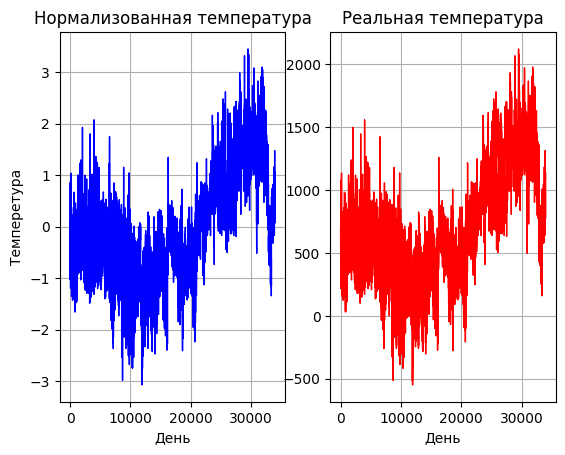

In [ ]:
# Создаем поле графика
fig, ax = plt.subplots(1, 2)

# Лимиты на осях
#ax[0].set_ylim([-10, 40])
#ax[1].set_ylim([-10, 40])

# Подписи осей
ax[0].set_ylabel("Темперетура")
ax[0].set_xlabel("День")
ax[1].set_xlabel("День")

ax[0].set_title("Нормализованная температура")
ax[1].set_title("Реальная температура")

# Сетка на осях
ax[0].grid()
ax[1].grid()

# Отображение нормализованных и ненормализованных данных
ax[0].plot(train_data[:, 42:], c="b", linewidth=1)
ax[1].plot(
    train_normalize_class.DeNormalizeData(train_data[:, 42:], axes=[0]),
    c="r",
    linewidth=1,
)

plt.show()

In [ ]:
window_size = train_data.shape[0] // 70
denoised_data: np.ndarray = (
    pd.Series(train_data[:, 42])
    .rolling(window=window_size)
    .mean()
    .iloc[window_size - 1 :]
    .values
)

Text(0, 0.5, 'Price')

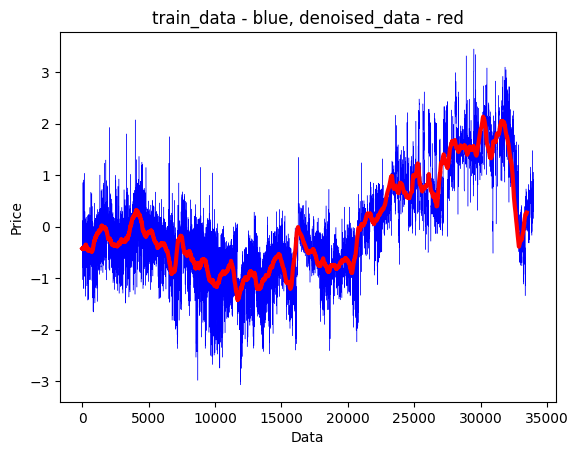

In [ ]:
plt.plot(train_data[:, 42], color="blue", linewidth=0.3)
plt.plot(denoised_data, color="red", linewidth=3)
plt.title("train_data - blue, denoised_data - red")
plt.xlabel("Data")
plt.ylabel("Price")

In [ ]:
# Значения на оси X (абсциссе), на основе которых модель будет делать предсказания
x_data:np.ndarray = np.linspace(0, len(denoised_data), len(denoised_data))

# Дискретное Преобразование Фурье, список амплитуд
mfft:np.ndarray = np.fft.fft(denoised_data)

# Получаем индексы частот, которые соответствуют самым значимым (с высокой амплитудой) синусоидам.
imax:np.ndarray = np.argsort(np.absolute(mfft))[::-1]

In [ ]:
# Кол-во синусов, которые мы будем суммировать
number_of_sinuses: int = 5

# Берем первые number_of_sinuses самых высоких амплитуд (они соответствуют частотам)
imax = imax[:number_of_sinuses]

# Вычисляем частоту каждой синусоиды
frequency:np.ndarray = np.array(imax) / len(denoised_data)

In [ ]:
# Начальные параметры
init_params: np.ndarray = np.array(
    [
        np.array([np.std(denoised_data), frequency[i] * 2 * np.pi, 0.0])
        for i in range(number_of_sinuses)
    ]
)

bias: float = np.mean(denoised_data)

In [ ]:
# Импорт модулей
import tensorflow as tf
from keras import layers
from keras.optimizers import Adam

tf.random.set_seed(8)

# Определяем слой
class SinLayer(layers.Layer):
    def __init__(self): # Инициализируем методы и атрибуты родительского класса
        super(SinLayer, self).__init__()

    def build(self, _): # Задаем начальные параметры
        self.kernel = self.add_weight(
            "kernel", shape=(number_of_sinuses, 3), trainable=True
        ) # Веса модели

        # Свободный коэффициент
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs): # Реализация функционала нашей модели (ранее в статье)
        result: float = 0
        for i in range(number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias # Результат работы модели

In [ ]:
import tensorflow.compat.v1 as tf

#tf.disable_v2_behavior()
# Плейсхолдер
#X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
#Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [ ]:
#import tensorflow.keras.backend as K
# Определение модели
model = tf.keras.Sequential(
	[
		layers.Input(shape=(42,)),
		SinLayer(),
	]
)

# Компилируем модель оптимизатором Adam (с наиболее подходящими параметрами)
# и ошибкой MSE
model.compile(Adam(0.001, 0.8, 0.9), "mean_squared_error")

# Задаем модели ранее определенные веса для правильной оптимизации весов
model.set_weights([init_params, bias])

NotImplementedError: ignored

In [ ]:
# Получаем историю ошибки модели
history = model.fit(x_data, denoised_data, epochs=10)

# Отображаем ее на графике
plt.plot(history.history["loss"])
plt.grid()
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки MSE на данной эпохе")
plt.show()

ValueError: ignored

In [ ]:
test_data[:, :42]

array([[1.43400000e+03, 1.58560311e+03, 9.76010101e+02, ...,
        8.40000000e+01, 2.00000000e+00, 2.34961000e+03],
       [1.43400000e+03, 1.58893774e+03, 9.78414141e+02, ...,
        8.40000000e+01, 3.00000000e+00, 2.34961000e+03],
       [1.43400000e+03, 1.57837743e+03, 9.76010101e+02, ...,
        7.70000000e+01, 2.00000000e+00, 2.34961000e+03],
       ...,
       [1.79100000e+03, 1.60370079e+03, 1.09367568e+03, ...,
        7.90000000e+01, 3.00000000e+00, 1.31182000e+03],
       [1.79100000e+03, 1.60296457e+03, 1.09367568e+03, ...,
        8.60000000e+01, 3.00000000e+00, 1.31182000e+03],
       [1.79100000e+03, 1.59634252e+03, 1.09367568e+03, ...,
        9.20000000e+01, 3.00000000e+00, 1.31182000e+03]])

In [ ]:
# Определяем функцию ошибки
def MAE(predictions: np.ndarray, labels: np.ndarray) -> float:
    return np.mean(np.abs(predictions - labels))

# Выводим значение ошибки
print(MAE(train_normalize_class.DeNormalizeData(model(test_data[:, :42]).numpy().T[0], axes=[0]) + np.random.normal(size=test_data[:, 42].shape), test_data[:, 42:]))

74250.4435135584


Text(0, 0.5, 'Price')

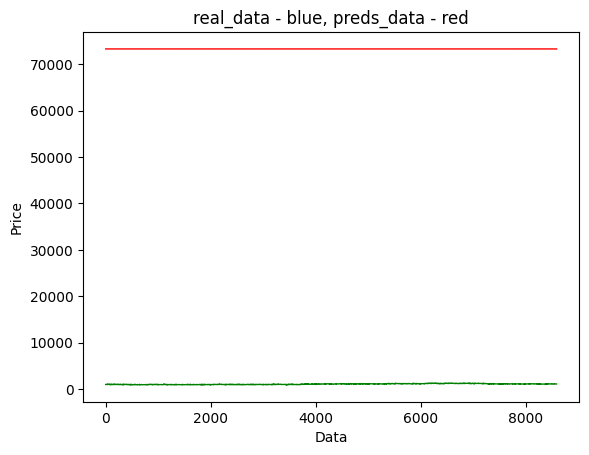

In [ ]:
preds = train_normalize_class.DeNormalizeData(model(test_data[:, :42]).numpy().T[0], axes=[0]) + np.random.normal(size=test_data[:,42].shape)
plt.plot(test_data[:, 42], color="green", linewidth=1)
plt.plot(preds, color="red", linewidth=1)
plt.title("real_data - blue, preds_data - red")
plt.xlabel("Data")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

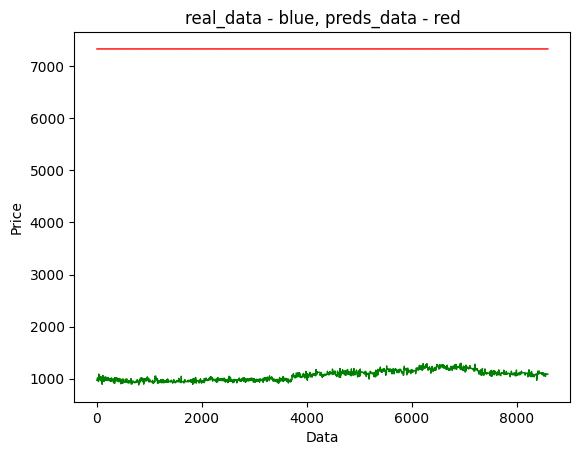

In [ ]:
preds = train_normalize_class.DeNormalizeData(model.predict(test_data[:, :42]), axes=[0]) + np.random.normal(size=test_data[:,42].shape)
plt.plot(test_data[:, 42], color="green", linewidth=1)
plt.plot(preds, color="red", linewidth=1)
plt.title("real_data - blue, preds_data - red")
plt.xlabel("Data")
plt.ylabel("Price")

# **Загрузка --> Нормализация_y --> Обучение --> Предсказание --> Денормализация --> График**

In [ ]:
# Импорт библиотек
from datetime import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Выгрузка данных из таблицы с тренировочными данными
train_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/train_data_r.csv", header=None).values

# Выгрузка данных из таблицы с тестовыми данными
test_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/Данные для конкурса ОБРАБОТКА/DATA/test_data_r.csv", header=None).values

In [ ]:
# Удаление заголовков
train_data = train_data[1:-1]
test_data = test_data[1:-1]

In [ ]:
def time_st(date_str: str) -> str:
  return date_str[:13]

In [ ]:
def days_since_zero_date(date_str: str) -> int:
    # Преобразование строки в объект datetime
    date_format: str = "%Y-%m-%d %H"
    date_obj = datetime.strptime(date_str, date_format)

    # Нулевая дата
    zero_date = datetime.strptime("2019-01-01 00", date_format)

    # Вычисление разницы в днях
    delta = date_obj - zero_date
    days = delta.days

    return days

In [ ]:
train_data[:, :1] = np.vectorize(time_st)(train_data[:, :1])
test_data[:, :1] = np.vectorize(time_st)(test_data[:, :1])

In [ ]:
# Применяем ранее определенную функцию ко всем датам датасета
train_data[:, :1] = np.vectorize(days_since_zero_date)(train_data[:, :1])
test_data[:, :1] = np.vectorize(days_since_zero_date)(test_data[:, :1])

train_data = train_data.astype("float")
test_data = test_data.astype("float")

In [ ]:
# Масштабирование данных
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train = scaler_X.fit_transform(train_data[:, :42])
y_train = scaler_Y.fit_transform(train_data[:, 42].reshape(-1, 1))

In [ ]:
a = []
for i in range(X_train.shape[0]):
    a.append(X_train[i][0])
a

In [ ]:
'''class Normalize:
    def __init__(self, data: np.ndarray) -> None:
        self.data: np.ndarray = np.copy(data) # Записываем копию данных

        # Вычисляем среднее по каждому столбцу
        self.__mean: np.ndarray = data.mean(axis=0)
        # Вычисляем стандартное отклонение по каждому столбцу
        self.__std_dev: np.ndarray = data.std(axis=0)

    def normalizeData(self) -> np.ndarray:
        # Возврат нормализованных даннах по формуле
        return (self.data - self.__mean) / self.__std_dev

    def DeNormalizeData(
        self, normalized_data: np.ndarray, axes: list[int] = [x for x in range(0, 44)]
    ) -> np.ndarray:
        # Денормализация днанных по указанной оси
        return normalized_data * self.__std_dev  + self.__mean #[axes] + self.__mean[axes]

# Нормализация температуры
train_normalize_class = Normalize(train_data[:, 42])
train_data_y = train_normalize_class.normalizeData()'''

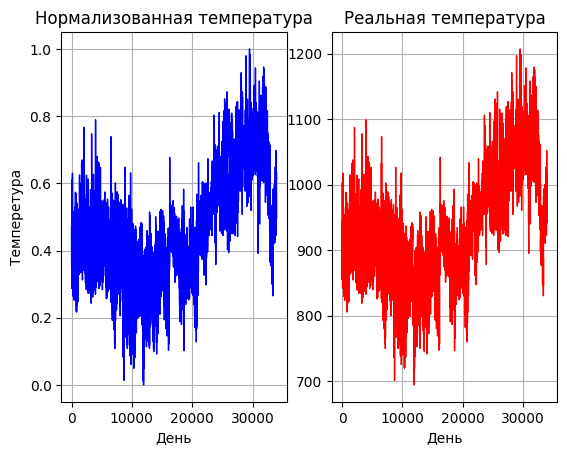

In [ ]:
# Создаем поле графика
fig, ax = plt.subplots(1, 2)

# Лимиты на осях
#ax[0].set_ylim([-10, 40])
#ax[1].set_ylim([-10, 40])

# Подписи осей
ax[0].set_ylabel("Темперетура")
ax[0].set_xlabel("День")
ax[1].set_xlabel("День")

ax[0].set_title("Нормализованная температура")
ax[1].set_title("Реальная температура")

# Сетка на осях
ax[0].grid()
ax[1].grid()

# Отображение нормализованных и ненормализованных данных
ax[0].plot(y_train, c="b", linewidth=1)
ax[1].plot(
    scaler_Y.inverse_transform(y_train),
    c="r",
    linewidth=1,
)

plt.show()

In [ ]:
window_size = y_train.shape[0] // 70
denoised_data: np.ndarray = (
    pd.Series(y_train.reshape(1, -1)[0])
    .rolling(window=window_size)
    .mean()
    .iloc[window_size - 1 :]
    .values
)

In [ ]:
y_train.reshape(1, -1)[0]

array([0.46732377, 0.46732377, 0.44549701, ..., 0.51630389, 0.51630389,
       0.61221418])

Text(0, 0.5, 'Price')

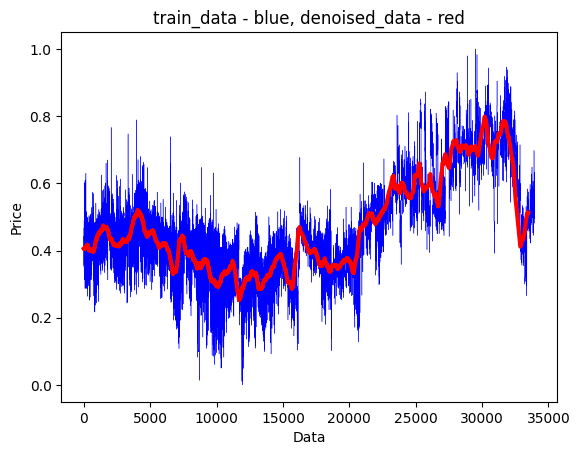

In [ ]:
plt.plot(y_train, color="blue", linewidth=0.3)
plt.plot(denoised_data, color="red", linewidth=3)
plt.title("train_data - blue, denoised_data - red")
plt.xlabel("Data")
plt.ylabel("Price")

In [ ]:
y_train = train_data[:, 42]

In [ ]:
X_train = train_data[:, :42]
y_train = y_train#denoised_data

X_test = test_data[:, :42]
y_test = test_data[:, 42]

In [ ]:
y_train.max(), y_test.max(), y_train.min(), y_test.min()

(1289.5166666666669, 1299.126984126984, 710.4358974358975, 694.4197530864197)

In [ ]:
nmax_t = np.where(y_train == y_train.max())
nmax_e = np.where(y_test == y_test.max())

nmin_t = np.where(y_train == y_train.min())
nmin_e = np.where(y_test == y_test.min())

X_train_max = X_train[nmax_t]
y_train_max = y_train[nmax_t]
X_train_min = X_train[nmin_t]
y_train_min = y_train[nmin_t]

X_test_max = X_train[nmax_e]
y_test_max = y_train[nmax_e]
X_test_min = X_train[nmin_e]
y_test_min = y_train[nmin_e]

nmax_t, nmax_e, nmin_t, nmin_e

((array([29495]),),
 (array([6935]),),
 (array([11934]),),
 (array([792, 793, 794, 795, 796, 797]),))

In [ ]:

# Альтернатива
nmax_t = np.where(y_train == y_train.max())
nmax_e = np.where(y_test == y_test.max())

nmin_t = np.where(y_train == y_train.min())
nmin_e = np.where(y_test == y_test.min())

X_train[nmax_t] = X_train[nmax_t]*10
y_train[nmax_t] = y_train[nmax_t]*10
X_train[nmin_t] = X_train[nmin_t]/10
y_train[nmin_t] = y_train[nmin_t]/10

In [ ]:
train = pd.concat([pd.DataFrame(X_train), pd.DataFrame({'y': y_train})], axis=1)#.fillna(0)
test = pd.concat([pd.DataFrame(X_test), pd.DataFrame({'y': y_test})], axis=1)#.fillna(0)
end_test = np.array(test)[6591:8591] #2000
test = pd.DataFrame(np.array(test)[:6591])
test = test.rename(columns={42: 'y'})

DATA = pd.concat([train, test], axis=0)
DATA = DATA.sample(frac=1).reset_index(drop=True)

k = DATA.shape[0]

X = DATA.drop(['y'], axis = 1)
Y = DATA['y']

train_r_X = np.array(list(np.array(X))[:int(0.75*k)])
train_r_Y = np.array(list(np.array(Y))[:int(0.75*k)])

test_r_X = np.array(list(np.array(X))[int(0.75*k):k])
test_r_Y = np.array(list(np.array(Y))[int(0.75*k):k])

In [ ]:
train_r_X = np.append(train_r_X, X_train_max, axis=0)

In [ ]:
train_r_Y = np.append(train_r_Y, y_train_max)

In [ ]:
X_train = train_r_X
y_train = train_r_Y

X_test = test_r_X
y_test = test_r_Y

In [ ]:
X_end = end_test[:, :42]
Y_end = end_test[:, 42]

array([1271.50819672, 1266.59016393, 1266.59016393, ..., 1087.75342466,
       1087.75342466, 1087.75342466])

In [ ]:
'''X_train_m = X_train[nmax_t]
y_train_m = y_train[nmax_t]

X_train[nmax_t] = X_test[nmax_e]
y_train[nmax_t] = y_test[nmax_e]

X_test[nmax_e] = X_train_m
y_test[nmax_e] = y_train_m'''

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30417, 42), (30417,), (10139, 42), (10139,))

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
# Initialize data

#train_data = data_train.drop(['y'], axis = 1)

#train_labels = data_train['y']


train_data = X_train
train_labels = y_train

In [ ]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.01,
                          depth=2)
                          #task_type="GPU",
                          #devices='0:1')

# Fit model
model.fit(train_data, train_labels)

0:	learn: 94.5157365	total: 108ms	remaining: 1m 47s
1:	learn: 93.8245536	total: 156ms	remaining: 1m 17s
2:	learn: 93.1331512	total: 187ms	remaining: 1m 2s
3:	learn: 92.4586669	total: 216ms	remaining: 53.9s
4:	learn: 91.7820919	total: 245ms	remaining: 48.8s
5:	learn: 91.1268251	total: 278ms	remaining: 46s
6:	learn: 90.4680238	total: 337ms	remaining: 47.8s
7:	learn: 89.8614124	total: 374ms	remaining: 46.4s
8:	learn: 89.2279805	total: 432ms	remaining: 47.5s
9:	learn: 88.5763832	total: 475ms	remaining: 47s
10:	learn: 87.9638001	total: 501ms	remaining: 45.1s
11:	learn: 87.3226887	total: 532ms	remaining: 43.8s
12:	learn: 86.6955090	total: 574ms	remaining: 43.6s
13:	learn: 86.1108922	total: 611ms	remaining: 43s
14:	learn: 85.5072422	total: 650ms	remaining: 42.7s
15:	learn: 84.8898339	total: 687ms	remaining: 42.2s
16:	learn: 84.2872885	total: 721ms	remaining: 41.7s
17:	learn: 83.7088959	total: 752ms	remaining: 41s
18:	learn: 83.1395499	total: 807ms	remaining: 41.7s
19:	learn: 82.5613190	total:

In [ ]:
yyy = np.array(pd.DataFrame(X_test)[1])

In [ ]:
min(yyy)

1403.9295154185022

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X_t = MinMaxScaler()
sc_x_t = scaler_X_t.fit_transform(X_test)

scaler_Y_t = MinMaxScaler()
sc_y_t = scaler_Y_t.fit_transform([[850], [1350]])#y_test.reshape(-1, 1))#yyy.reshape(-1, 1))

In [ ]:
# Масштабирование данных
from sklearn.preprocessing import MinMaxScaler
scaler_P = MinMaxScaler()
preds_s = scaler_P.fit_transform(y_test.reshape(-1, 1))

preds = scaler_P.inverse_transform(preds.reshape(-1, 1))

preds

array([[1112.074042  ],
       [1112.66376968],
       [1112.11130005],
       ...,
       [1180.30843797],
       [1180.25291584],
       [1180.24422691]])

In [ ]:
preds

array([0.551846  , 0.55325891, 0.55193526, ..., 0.71532655, 0.71519352,
       0.71517271])

In [ ]:
preds = model.predict(sc_x_t)
preds = scaler_Y_t.inverse_transform(preds.reshape(-1, 1))

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds

array([1023.71846608, 1064.2193656 ,  966.23357333, ..., 1109.74371624,
       1091.40158283,  921.57441304])

In [ ]:
from xgboost import XGBRegressor
# read data
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
#data = load_iris()
#X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBRegressor(n_estimators=1000, max_depth=2, learning_rate=0.01, objective='reg:linear')#'binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:58:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
import lightgbm as lgb

print("Размеры Train/Test: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train_dataset = lgb.Dataset(X_train, y_train)
test_dataset = lgb.Dataset(X_test, y_test)

booster = lgb.train({"objective": "regression"},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=50)

Размеры Train/Test:  (30417, 42) (10139, 42) (30417,) (10139,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9740
[LightGBM] [Info] Number of data points in the train set: 30417, number of used features: 42
[LightGBM] [Info] Start training from score 952.171884


In [ ]:
idxs = booster.predict(X_test, pred_leaf=True)

print("Размерность: ", idxs.shape)

idxs

Размерность:  (8591, 100)


array([[17, 16, 22, ...,  3, 14,  6],
       [17, 16, 22, ...,  3, 14,  6],
       [17, 16, 22, ...,  3, 14,  6],
       ...,
       [16, 25, 26, ..., 22, 14,  6],
       [16, 25, 26, ..., 28, 14,  6],
       [16, 25, 26, ..., 28, 14,  6]], dtype=int32)

In [ ]:
shap_vals = booster.predict(X_test, pred_contrib=True)

print("Размерность: ", shap_vals.shape)

print("\nЗначения Shap для нулевого семпла: ", shap_vals[0])
print("\nПредсказания с использованием значений SHAP: ", shap_vals[0].sum())
#print("Предсказания без SHAP: ", test_preds[0])

Размерность:  (8591, 43)

Значения Shap для нулевого семпла:  [ 4.99480969e+00 -1.06851484e+00  2.90169994e+01 -1.00687188e+00
  1.73979090e-01 -3.38711920e-01  2.03150938e-01  3.44018553e-03
 -4.35700725e-02 -9.96441957e-02 -1.49746313e+00  3.42214087e-01
 -2.13151600e-01 -8.70367898e-01  4.94368440e-03  4.43443686e-01
  2.80218076e-01 -8.06878354e-01 -1.22762949e-01  1.16568774e+00
  1.10363208e-01  1.12342354e+00 -7.21229191e-01 -1.29707278e+00
 -1.64681143e+00 -9.31545257e-01 -7.19983094e-01  1.21705558e+00
 -4.00935879e-01 -3.67356035e+00 -6.95813894e-01 -4.35327398e-01
 -3.02881223e+00 -4.72125248e+00 -1.10554265e-01  8.45144639e-01
 -1.25080611e+00  1.68328710e+00 -1.99379453e-01  1.30879881e-01
 -3.51537077e-01  5.71356101e-01  9.35920520e+02]

Предсказания с использованием значений SHAP:  951.9783589801642


In [ ]:
preds = booster.predict(X_test, pred_contrib=True)
preds_r = []
for i in preds:
  preds_r.append(i.sum())
preds_r = np.array(preds_r)
preds_r

array([ 911.34390197, 1067.43809168,  918.55435777, ...,  874.16921269,
       1094.49005154, 1065.89210056])

In [ ]:
preds = preds_r

In [ ]:
preds_1 = bst.predict(X_test)
preds_2 = model.predict(X_test)
preds = (preds_1 + preds_2) / 2
preds

array([ 890.03545294,  884.19458362,  916.99286191, ...,  935.55746391,
       1067.41770705, 1094.68048854])

In [ ]:
#preds = model.predict(test_data[:, :42])
#preds = bst.predict(test_data[:, :42])
preds = booster.predict(test_data[:, :42], pred_contrib=True)
preds_r = []
for i in preds:
  preds_r.append(i.sum())
preds_r = np.array(preds_r)
preds = preds_r
y_test = test_data[:, 42]

In [ ]:
#preds = model.predict(test_data[:, :42])
#preds = bst.predict(test_data[:, :42])
preds = booster.predict(X_end, pred_contrib=True)
preds_r = []
for i in preds:
  preds_r.append(i.sum())
preds_r = np.array(preds_r)
preds = preds_r
y_test = Y_end

In [ ]:
y_test = test_data[:, 42]

In [ ]:
preds_1 = bst.predict(test_data[:, :42])
preds_2 = model.predict(test_data[:, :42])
preds = (preds_1 + preds_2) / 2
preds

array([ 971.94722186,  974.1147588 ,  971.95424613, ..., 1093.9318213 ,
       1094.36578536, 1094.9078772 ])

In [ ]:
def induction(data):
  del_num = data.shape[0] % 24
  return data[:-del_num]

In [ ]:
#preds = np.array(eval_data['Сибирь']) - np.array(preds)
y_mean = induction(y_test).reshape(357, 24)#(np.array(eval_data['Сибирь']) - np.array(eval_labels)).reshape(357, 24)
y_mean_r = []
for i in range(len(y_mean)):
  y_mean_r.append(y_mean[i].mean())

y_preds_mean = induction(preds).reshape(357, 24)
y_preds_mean_r = []
for i in range(len(y_preds_mean)):
  y_preds_mean_r.append(y_preds_mean[i].mean())
y_mean_r = np.array(y_mean_r)
y_preds_mean_r = y_preds_mean_r = np.array(y_preds_mean_r)

#y_mean_r, y_preds_mean_r

ValueError: ignored

In [ ]:
y_mean_r = y_test
y_preds_mean_r = preds

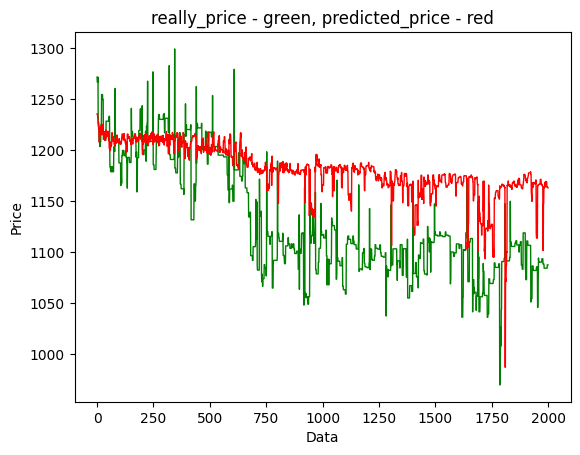

In [ ]:
import matplotlib.pyplot as mtp
mtp.plot(y_mean_r, color="green", linewidth=1)
mtp.plot(y_preds_mean_r, color="red", linewidth=1)
mtp.title("really_price - green, predicted_price - red")
mtp.xlabel("Data")
mtp.ylabel("Price")
mtp.show()
#mtp.savefig('/content/sample_data/Test.png', dpi=100)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test, preds))

64.6745320707111

In [ ]:
def accur(y, p, gran=10):
  answ = []
  for n in range(len(y)):
      answ.append(abs(y[n]-p[n]))

  good = 0
  bad = 0
  for i in answ:
    if i <= gran:
      good += 1
    else:
      bad += 1

  return good, bad, good/(bad + good)

accur(y_test, preds, 15) # 35 - это +- 35 рублей ошибка предсказния. При таком раскладе точность предсказания ~50%. Это значит, что в половине случаев цена уложится в границу, а в половине случаев - нет.

(320, 1680, 0.16)

In [ ]:
# Определяем функцию ошибки
def MAE(predictions: np.ndarray, labels: np.ndarray) -> float:
    return np.mean(np.abs(predictions - labels))

# Выводим значение ошибки
#print(MAE(train_normalize_class.DeNormalizeData(model(test_data[:, :42]).numpy().T[0], axes=[0]) + np.random.normal(size=test_data[:, 42].shape), test_data[:, 42:]))
print(MAE(preds, y_test))

55.281818889234906


In [ ]:
from scipy.stats import pearsonr as KK
b = []
for i in range(len(X_train)):
  for n in range(42):
      kk = KK(X_train[n][i], y_train.reshape(1, -1)[0])[0]
      b.append(kk)
  print(f'Коэффициент корреляции {i}: {kk}')
print(max(b))

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
y_train.reshape(1, -1)[0]

array([0.46732377, 0.46732377, 0.44549701, ..., 0.51630389, 0.51630389,
       0.61221418])

# **Model: TensorFlow**

In [ ]:
import tensorflow as tf

In [ ]:
# Инициализаторы
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [ ]:
# Параметры архитектуры модели
n_stocks = 42
n_neurons_1 = 100
n_neurons_2 = 50
n_neurons_3 = 25
n_neurons_4 = 5
n_target = 1
# Уровень 1: Переменные для скрытых весов и смещений
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Уровень 2: Переменные для скрытых весов и смещений
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Уровень 3: Переменные для скрытых весов и смещений
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Уровень 4: Переменные для скрытых весов и смещений
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Уровень выходных данных: Переменные для скрытых весов и смещений
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
# Плейсхолдер
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [ ]:
# Скрытый уровень
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Выходной уровень (должен быть транспонирован)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [ ]:
# Функция стоимости
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [ ]:
# Оптимизатор
opt = tf.train.AdamOptimizer().minimize(mse)

In [ ]:
import matplotlib.pyplot as plt
# Создание сессии
net = tf.Session()
# Запуск инициализатора
net.run(tf.global_variables_initializer())

# Настройка интерактивного графика
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Количество эпох и размер куска данных
epochs = 100
batch_size = len(y_train)

for e in range(epochs):

    # Перемешивание данных для обучения
    #shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    #X_train = X_train[shuffle_indices]
    #y_train = y_train[shuffle_indices]

    # Обучение мини-партией
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        #batch_y = np.expand_dims(batch_y, axis=-1)
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Показать прогресс
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test}).reshape(8591, 1).T[0]
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            #file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            #plt.savefig(file_name)
            plt.pause(0.01)
# Вывести финальную фукнцию MSE после обучения
mse_final = net.run(mse, feed_dict={X: batch_x, Y: batch_y})
print(mse_final)

In [ ]:
'''# Получаем историю ошибки модели
history = model.fit(x_data, denoised_data, epochs=10)

# Отображаем ее на графике
plt.plot(history.history["loss"])
plt.grid()
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки MSE на данной эпохе")
plt.show()'''

In [ ]:
# Определяем функцию ошибки
def MAE(predictions: np.ndarray, labels: np.ndarray) -> float:
    return np.mean(np.abs(predictions - labels))

# Выводим значение ошибки
print(MAE(train_normalize_class.DeNormalizeData(net.run(out, feed_dict={X: X_test}).reshape(8591, 1).T[0], axes=[0]), test_data[:, 42]))

3507.8246144287305


Text(0, 0.5, 'Price')

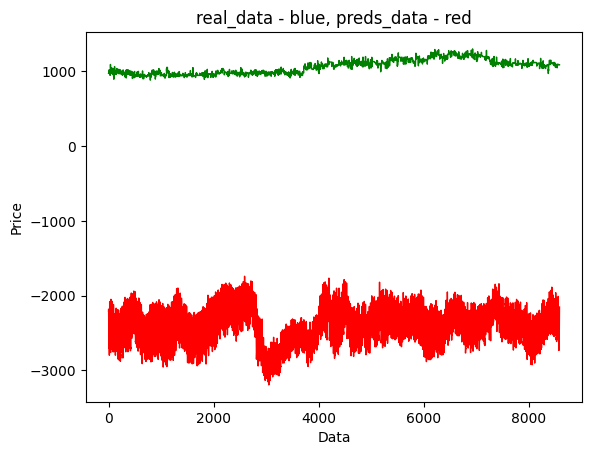

In [ ]:
preds = train_normalize_class.DeNormalizeData(net.run(out, feed_dict={X: X_test}).reshape(8591, 1).T[0])
plt.plot(test_data[:, 42], color="green", linewidth=1)
plt.plot(preds, color="red", linewidth=1)
plt.title("real_data - blue, preds_data - red")
plt.xlabel("Data")
plt.ylabel("Price")

In [ ]:
preds = preds.reshape(8591, 1).T[0]

array([3772.4138, 3669.2517, 3655.5247, ..., 3865.011 , 3734.4937,
       3720.7234], dtype=float32)

In [ ]:
test_data[:, 42]

array([ 972.92857143,  975.35714286,  972.92857143, ..., 1087.75342466,
       1087.75342466, 1087.75342466])

In [ ]:
pred = net.run(out, feed_dict={X: X_test}).reshape(8591, 1).T[0]
pred.shape

(8591,)

# **Model: PyTorch**

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
X, y, a, b = torch.Tensor([X_train]), torch.Tensor([y_train]), torch.Tensor([X_test]), torch.Tensor([y_test])

<ipython-input-165-df39931017e3>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  X, y, a, b = torch.Tensor([X_train]), torch.Tensor([y_train]), torch.Tensor([X_test]), torch.Tensor([y_test])


In [ ]:
X.shape, y.shape, a.shape, b.shape

(torch.Size([1, 33965, 42]),
 torch.Size([1, 33481]),
 torch.Size([1, 8591, 42]),
 torch.Size([1, 8591]))

In [ ]:
from torch import nn, optim

epochs = 100

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(42, 100)
        self.fc2 = nn.Linear(100, 1)

    def forward(self, x):
        x = self.fc1(x)                          # выход первого слоя
        x = self.fc2(x)                          # выход второго слоя
        return x

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)#, momentum=0.8)

for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(X)
    loss = criterion(predictions, y)
    # get gradients
    loss.backward()
    # update parameters
    optimizer.step()

    #if (epoch + 1) % (epochs / 10) == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 33481])) that is different to the input size (torch.Size([1, 33965, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 375146.96875
epoch 1, loss 514006400.0
epoch 2, loss 35800316.0
epoch 3, loss 92004696.0
epoch 4, loss 224082880.0
epoch 5, loss 157340528.0
epoch 6, loss 47940268.0
epoch 7, loss 536027.9375
epoch 8, loss 20440132.0
epoch 9, loss 60104888.0
epoch 10, loss 74772912.0
epoch 11, loss 58660160.0
epoch 12, loss 30161336.0
epoch 13, loss 7823936.5
epoch 14, loss 24393.6171875
epoch 15, loss 5257311.0
epoch 16, loss 16227582.0
epoch 17, loss 24668526.0
epoch 18, loss 25999430.0
epoch 19, loss 20834918.0
epoch 20, loss 12793175.0
epoch 21, loss 5552167.0
epoch 22, loss 1192540.75
epoch 23, loss 23518.689453125
epoch 24, loss 1208456.125
epoch 25, loss 3497175.0
epoch 26, loss 5741868.5
epoch 27, loss 7167653.0
epoch 28, loss 7456783.0
epoch 29, loss 6696591.0
epoch 30, loss 5238509.0
epoch 31, loss 3527679.75
epoch 32, loss 1960448.25
epoch 33, loss 801568.8125
epoch 34, loss 161662.9375
epoch 35, loss 16534.61328125
epoch 36, loss 247346.375
epoch 37, loss 686861.1875
epoch 38,

KeyboardInterrupt: ignored

In [ ]:
preds = model(torch.Tensor(np.array(a))).detach().numpy()

In [ ]:
preds

array([[[-585.60223],
        [-592.594  ],
        [-598.21936],
        ...,
        [-520.9889 ],
        [-527.7824 ],
        [-499.51205]]], dtype=float32)

In [ ]:
# Определяем функцию ошибки
def MAE(predictions: np.ndarray, labels: np.ndarray) -> float:
    return np.mean(np.abs(predictions - labels))

# Выводим значение ошибки
print(MAE(train_normalize_class.DeNormalizeData(np.array(preds), axes=[0]), np.array(b)))

38990.94


ValueError: ignored

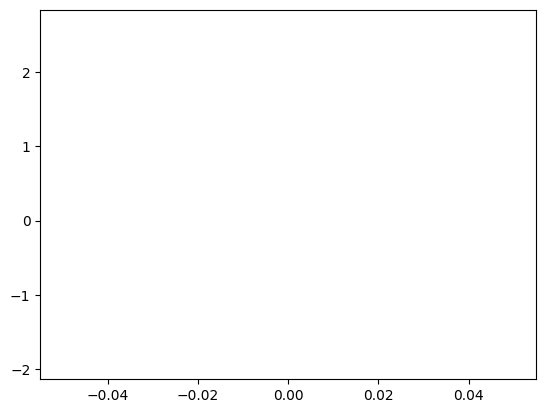

In [ ]:
preds = train_normalize_class.DeNormalizeData(np.array(preds), axes=[0])
plt.plot(np.array(b), color="green", linewidth=1)
plt.plot(preds, color="red", linewidth=1)
plt.title("real_data - blue, preds_data - red")
plt.xlabel("Data")
plt.ylabel("Price")

In [ ]:
preds

array([[[-45075.895],
        [-45625.25 ],
        [-46067.246],
        ...,
        [-39999.11 ],
        [-40532.887],
        [-38311.637]]], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train = train_data[:, :42]
y_train = train_data[:, 42]

X_test = test_data[:, :42]
y_test = test_data[:, 42]

In [ ]:
basic_model = Sequential()
basic_model.add(Dense(units = 500 , activation = 'relu', input_shape = (5000,)))
basic_model.add(Dropout(0.2, input_shape=(5000,)))
basic_model.add(Dense(units = 100 , activation = 'relu'))
basic_model.add(Dense(units = 50 , activation = 'gelu'))
# basic_model.add(Dense(units = 32 , activation = 'gelu', input_shape = (13,)))
basic_model.add(Dense(1, activation = 'sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics=["accuracy"])
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
history = basic_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1062/1062 [==============================] - 11s 5ms/step - loss: -679635155156992.0000 - accuracy: 0.0000e+00
Epoch 2/50
1062/1062 [==============================] - 4s 3ms/step - loss: -17718010332577792.0000 - accuracy: 0.0000e+00
Epoch 3/50
1062/1062 [==============================] - 4s 3ms/step - loss: -95259015960854528.0000 - accuracy: 0.0000e+00
Epoch 4/50
1062/1062 [==============================] - 5s 4ms/step - loss: -282874380134907904.0000 - accuracy: 0.0000e+00
Epoch 5/50
1062/1062 [==============================] - 4s 4ms/step - loss: -628876533183807488.0000 - accuracy: 0.0000e+00
Epoch 6/50
1062/1062 [==============================] - 4s 4ms/step - loss: -1181767467039457280.0000 - accuracy: 0.0000e+00
Epoch 7/50
1062/1062 [==============================] - 4s 4ms/step - loss: -1994189049660702720.0000 - accuracy: 0.0000e+00
Epoch 8/50
1062/1062 [==============================] - 5s 5ms/step - loss: -3123142162854707200.0000 - accuracy: 0.0000e+00
Epoch 9/5

KeyboardInterrupt: ignored